# DFA

In [2]:
import pandas as pd
import os
from scipy.interpolate import PchipInterpolator
import numpy as np
from scipy.stats import spearmanr
import piecewise_regression
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu


In [3]:
#dataframe datos de compositores 
import copy
datos_composers = {}
carpeta = r'Sequences\labels'
archivos_en_carpeta = os.listdir(carpeta)
index0 = 0
indice = 0

for archivo in archivos_en_carpeta:
    ruta_completa = os.path.join(carpeta, archivo)
    serie = pd.read_csv(ruta_completa, header = None)
    composer = archivo.split('-')[1].capitalize() # nombre compositor
    datos_composers[composer] = {} #genero bibio para composer
    datos_composers[composer]['Birth_year'] = archivo.split('-')[0] #año de nacimiento
    index1 = serie.iloc[0, 0].split('\t')[0] #el # del primer serie del composer
    index2 = int(serie.iloc[len(serie)-3, 0].split('\t')[0]) - index0 # # Piezas
    index0 = index2 + index0 # numero total de piezas anteriores
    datos_composers[composer]['# Piezas'] = index2 # Piezas
    datos_composers[composer]['Indice'] = indice
    indice += 1

composers = {}
M = 0
carpeta = r'Sequences\Series'
archivos_en_carpeta = os.listdir(carpeta)

for archivo in archivos_en_carpeta:
    ruta_completa = os.path.join(carpeta, archivo)
    serie = pd.read_csv(ruta_completa)
    # escoge una serie
    composer = archivo.split('-')[1].capitalize() # nombre compositor
    composers[composer] = {}

    for pieza in range( datos_composers[composer]['# Piezas'] ):
        N = serie.iloc[0, 0].split('\t')[1] # # de elementos por pieza
        M = int(N) + M
        index_n1 = 0 
        index_n2 = int(N)+2 
        serie_n = serie[index_n1 + 2:index_n2].reset_index(drop=True) # resetear index
        serie = serie[index_n2 +1:] # recortar serie Original
        serie_n.index += 1 # que index empiece desde 1
        num_serie_T = serie.columns[0]  # numero de serie de todo el dataset
        num_serie = pieza + 1
        composers[composer]['Serie_'+str(num_serie)] = serie_n.squeeze().to_numpy().astype(float) # agregamos pieza al dicc composer con key como # serie

###
###

composers_depurado = copy.deepcopy(composers)
datos_composers_depurado = copy.deepcopy(datos_composers)

for i,composer in enumerate(composers.keys()):
    d = 0
    for pieza in composers[composer].keys():
        if len(composers[composer][pieza])//2 < 400:
            del composers_depurado[composer][pieza]
            d = d + 1
    datos_composers_depurado[composer]['# Piezas'] = datos_composers[composer]['# Piezas'] - d


# 40 promedio de numero de piezas por compositor
composers_depurado_v2 = copy.deepcopy(composers_depurado)
composers_depurado_v2_keychange = copy.deepcopy(composers_depurado_v2)
datos_composers_depurado_v2 = copy.deepcopy(datos_composers_depurado)

for composer in composers.keys():
    if datos_composers_depurado[composer]['# Piezas'] < 30:
        del composers_depurado_v2[composer]
        del datos_composers_depurado_v2[composer]
    
for i,composer in enumerate(composers_depurado_v2.keys()):
    datos_composers_depurado_v2[composer]['Indice'] = i 

for composer in composers_depurado_v2.keys():
    for i,serie in enumerate(composers_depurado_v2[composer].keys()):
        composers_depurado_v2_keychange[composer]['Serie_' + str(i+1)] = composers_depurado_v2_keychange[composer].pop(serie)

print(" # de compositores restantes: ", len(composers_depurado_v2))

 # de compositores restantes:  19


In [4]:
composers_depurado_v2['Beethoven'].keys()

dict_keys(['Serie_1', 'Serie_3', 'Serie_4', 'Serie_5', 'Serie_6', 'Serie_7', 'Serie_10', 'Serie_11', 'Serie_12', 'Serie_15', 'Serie_16', 'Serie_19', 'Serie_22', 'Serie_25', 'Serie_30', 'Serie_62', 'Serie_63', 'Serie_64', 'Serie_65', 'Serie_66', 'Serie_67', 'Serie_68', 'Serie_69', 'Serie_70', 'Serie_71', 'Serie_72', 'Serie_73', 'Serie_74', 'Serie_75', 'Serie_77', 'Serie_80', 'Serie_82', 'Serie_83', 'Serie_84', 'Serie_85', 'Serie_87', 'Serie_91', 'Serie_92', 'Serie_93', 'Serie_94', 'Serie_95', 'Serie_96', 'Serie_101', 'Serie_103', 'Serie_104', 'Serie_105', 'Serie_106', 'Serie_107', 'Serie_108', 'Serie_114', 'Serie_115', 'Serie_170', 'Serie_171', 'Serie_172', 'Serie_173', 'Serie_182', 'Serie_184', 'Serie_185', 'Serie_186', 'Serie_187', 'Serie_188', 'Serie_189', 'Serie_190', 'Serie_191', 'Serie_192', 'Serie_193', 'Serie_194', 'Serie_195', 'Serie_196', 'Serie_197', 'Serie_198', 'Serie_199', 'Serie_200', 'Serie_201', 'Serie_202', 'Serie_203', 'Serie_204', 'Serie_205', 'Serie_208', 'Serie_209

In [15]:
def midi(midi_number):
    note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    octave = midi_number // 12 - 1
    note_index = midi_number % 12
    note = note_names[note_index]
    return f"{note}{octave}"


In [35]:
for i in list(composers_depurado_v2['Beethoven']['Serie_63']):
    print(i,midi(int(i)-1))

63.0 D4
67.0 F#4
65.0 E4
63.0 D4
75.0 D5
65.0 E4
68.0 G4
67.0 F#4
65.0 E4
80.0 G5
80.0 G5
82.0 A5
80.0 G5
79.0 F#5
77.0 E5
79.0 F#5
77.0 E5
75.0 D5
74.0 C#5
75.0 D5
74.0 C#5
72.0 B4
70.0 A4
72.0 B4
70.0 A4
68.0 G4
63.0 D4
51.0 D3
55.0 F#3
60.0 B3
63.0 D4
55.0 F#3
58.0 A3
55.0 F#3
46.0 A2
52.0 D#3
46.0 A2
53.0 E3
46.0 A2
55.0 F#3
46.0 A2
56.0 G3
46.0 A2
55.0 F#3
46.0 A2
53.0 E3
46.0 A2
65.0 E4
65.0 E4
66.0 F4
67.0 F#4
68.0 G4
82.0 A5
68.0 G4
67.0 F#4
67.0 F#4
65.0 E4
65.0 E4
65.0 E4
77.0 E5
74.0 C#5
82.0 A5
74.0 C#5
75.0 D5
79.0 F#5
75.0 D5
75.0 D5
72.0 B4
72.0 B4
69.0 G#4
81.0 G#5
82.0 A5
84.0 B5
86.0 C#6
87.0 D6
88.0 D#6
89.0 E6
88.0 D#6
89.0 E6
86.0 C#6
82.0 A5
82.0 A5
77.0 E5
74.0 C#5
80.0 G5
82.0 A5
80.0 G5
79.0 F#5
77.0 E5
79.0 F#5
77.0 E5
75.0 D5
74.0 C#5
72.0 B4
75.0 D5
74.0 C#5
72.0 B4
72.0 B4
71.0 A#4
84.0 B5
87.0 D6
84.0 B5
81.0 G#5
87.0 D6
84.0 B5
81.0 G#5
79.0 F#5
77.0 E5
79.0 F#5
75.0 D5
74.0 C#5
82.0 A5
77.0 E5
75.0 D5
74.0 C#5
72.0 B4
74.0 C#5
70.0 A4
69.0 G#4
75.0 D5
72

In [3]:
composer = 'Beethoven'
serie_past=[1,2]
for serie in composers_depurado_v2[composer].keys():
    for serie2 in composers_depurado_v2[composer].keys():
        if list(composers_depurado_v2[composer][serie]) == list(composers_depurado_v2[composer][serie2]):
            if serie != serie2 and [serie,serie2] != serie_past[::-1]:
                serie_past = [serie,serie2]
                print("iguales",serie,serie2)

iguales Serie_91 Serie_92
iguales Serie_93 Serie_171
iguales Serie_94 Serie_373
iguales Serie_95 Serie_173
iguales Serie_171 Serie_93
iguales Serie_173 Serie_95
iguales Serie_292 Serie_293
iguales Serie_373 Serie_94
iguales Serie_480 Serie_481
iguales Serie_482 Serie_483
iguales Serie_550 Serie_551


In [20]:
def DFA(time_series):

    # Cargar tus datos en lugar de los generados aleatoriamente
    # Reemplaza esta línea con la carga de tus datos reales
    my_data = time_series  # Reemplaza esta línea con tus datos reales

    # Convertir la serie a un formato compatible con Fathon
    my_data = fu.toAggregated(my_data)

    # Determinar la longitud de la serie temporal
    data_length = len(my_data)

    # Ajustar los tamaños de ventana para que no excedan la longitud de los datos
    winSizes = fu.linRangeByStep(20, min(500, data_length // 4))  # Ajusta según la longitud de tus datos
    revSeg = False  # Configura si deseas usar segmentos invertidos
    polOrd = 2 # Orden del polinomio para eliminar la tendencia, ajusta según tu cas3

    # Crear el objeto DFA con tus datos
    pydfa = fathon.DFA(my_data)

    # Calcular las fluctuaciones
    n, F = pydfa.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)


    # # Si deseas realizar ajustes múltiples en diferentes rangos, configura los límites aquí
    # limits_list = np.array([[20, min(50, data_length // 4)]], dtype=int)  # Ajusta según sea necesario
    # list_H, list_H_intercept = pydfa.multiFitFlucVec(limits_list)

    # # Graficar los resultados de los múltiples ajustes
    # clrs = ['k', 'b', 'm', 'c', 'y']
    # stls = ['-', '--', '.-']

    return n, F


In [21]:
def DFA_logbin(time_series):
    # Convertir la serie temporal a un formato compatible con Fathon
    my_data = fu.toAggregated(time_series)
    data_length = len(my_data)

    # Definir tamaños de ventana
    winSizes = fu.linRangeByStep(20, min(500, data_length // 4))  # Ajusta los límites según los datos
    revSeg = False  # Si deseas usar segmentos invertidos
    polOrd = 2  # Orden del polinomio para eliminar tendencias

    # Crear el objeto DFA y calcular las fluctuaciones
    pydfa = fathon.DFA(my_data)
    n, F = pydfa.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)

    # Aplicar log-binning
    log_bins = np.logspace(np.log10(min(n)), np.log10(max(n)), num=15)
    binned_F = []
    binned_n = []
    for i in range(len(log_bins) - 1):
        mask = (n >= log_bins[i]) & (n < log_bins[i + 1])
        if np.any(mask):
            binned_n.append(np.mean(n[mask]))
            binned_F.append(np.mean(F[mask]))

    return binned_n, binned_F


In [71]:
def calculate_increment_series(time_series):
    """Calcula la serie de incrementos."""
    return np.diff(time_series)

def decompose_series(increment_series):
    """Descompone la serie de incrementos en magnitudes y signos, y resta las medias."""
    magnitude_series = np.abs(increment_series)
    sign_series = np.sign(increment_series)
    
    # Restar las medias
    magnitude_series -= np.mean(magnitude_series)
    sign_series -= np.mean(sign_series)
    
    return magnitude_series, sign_series

def integrate_series(series):
    """Integra la serie para asegurar que esté positivamente correlacionada."""
    return np.cumsum(series)


def mdfa(time_series):
    """
    Implementación del MDFA siguiendo los pasos especificados.
    :param time_series: Serie temporal (numpy array).
    :param scale_range: Rango de tamaños de ventana para el análisis de escala.
    :return: Exponentes de escala para la serie de magnitudes y signos.
    """
    # Paso 1: Calcular la serie de incrementos
    increment_series = calculate_increment_series(time_series)
    
    # Paso 2: Descomponer la serie de incrementos en magnitud y signo, restar medias
    magnitude_series, sign_series = decompose_series(increment_series)
    
    # Paso 3: Integrar las series de magnitudes y signos
    integrated_magnitude = integrate_series(magnitude_series)
    integrated_sign = integrate_series(sign_series)
    
    # Paso 4: Aplicar DFA a ambas series integradas
    n_mag, F_mag = DFA(integrated_magnitude)
    # alpha_sign = DFA(integrated_sign)

    
    return n_mag, F_mag

In [6]:
"""iaaft - Iterative amplitude adjusted Fourier transform surrogates
        #! /usr/bin/env python3
        This module implements the IAAFT method [1] to generate time series
        surrogates (i.e. randomized copies of the original time series) which
        ensures that each randomised copy preserves the power spectrum of the
        original time series.

[1] Venema, V., Ament, F. & Simmer, C. A stochastic iterative amplitude
    adjusted Fourier Transform algorithm with improved accuracy (2006), Nonlin.
    Proc. Geophys. 13, pp. 321--328
    https://doi.org/10.5194/npg-13-321-2006

"""
# Created: Tue Jun 22, 2021  09:44am
# Last modified: Tue Jun 22, 2021  12:39pm
#
# Copyright (C) 2021  Bedartha Goswami <bedartha.goswami@uni-tuebingen.de> This
# program is free software: you can redistribute it and/or modify it under the
# terms of the GNU Affero General Public License as published by the Free
# Software Foundation, either version 3 of the License, or (at your option) any
# later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Affero General Public License for more details.

# You should have received a copy of the GNU Affero General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.
# -----------------------------------------------------------------------------


import numpy as np
from tqdm import tqdm


def iaaft(x, ns, tol_pc=5., verbose=True, maxiter=1E6, sorttype="quicksort"):
    """
    Returns iAAFT surrogates of given time series.

    Parameter
    ---------
    x : numpy.ndarray, with shape (N,)
        Input time series for which IAAFT surrogates are to be estimated.
    ns : int
        Number of surrogates to be generated.
    tol_pc : float
        Tolerance (in percent) level which decides the extent to which the
        difference in the power spectrum of the surrogates to the original
        power spectrum is allowed (default = 5).
    verbose : bool
        Show progress bar (default = `True`).
    maxiter : int
        Maximum number of iterations before which the algorithm should
        converge. If the algorithm does not converge until this iteration
        number is reached, the while loop breaks.
    sorttype : string
        Type of sorting algorithm to be used when the amplitudes of the newly
        generated surrogate are to be adjusted to the original data. This
        argument is passed on to `numpy.argsort`. Options include: 'quicksort',
        'mergesort', 'heapsort', 'stable'. See `numpy.argsort` for further
        information. Note that although quick sort can be a bit faster than 
        merge sort or heap sort, it can, depending on the data, have worse case
        spends that are much slower.

    Returns
    -------
    xs : numpy.ndarray, with shape (ns, N)
        Array containing the IAAFT surrogates of `x` such that each row of `xs`
        is an individual surrogate time series.

    See Also
    --------
    numpy.argsort

    """
    # as per the steps given in Lancaster et al., Phys. Rep (2018)
    nx = x.shape[0]
    xs = np.zeros((ns, nx))
    maxiter = 10000
    ii = np.arange(nx)

    # get the fft of the original array
    x_amp = np.abs(np.fft.fft(x))
    x_srt = np.sort(x)
    r_orig = np.argsort(x)

    # loop over surrogate number
    pb_fmt = "{desc:<5.5}{percentage:3.0f}%|{bar:30}{r_bar}"
    pb_desc = "Estimating IAAFT surrogates ..."
    for k in tqdm(range(ns), bar_format=pb_fmt, desc=pb_desc,
                  disable=not verbose):

        # 1) Generate random shuffle of the data
        count = 0
        r_prev = np.random.permutation(ii)
        r_curr = r_orig
        z_n = x[r_prev]
        percent_unequal = 100.

        # core iterative loop
        while (percent_unequal > tol_pc) and (count < maxiter):
            r_prev = r_curr

            # 2) FFT current iteration yk, and then invert it but while
            # replacing the amplitudes with the original amplitudes but
            # keeping the angles from the FFT-ed version of the random
            y_prev = z_n
            fft_prev = np.fft.fft(y_prev)
            phi_prev = np.angle(fft_prev)
            e_i_phi = np.exp(phi_prev * 1j)
            z_n = np.fft.ifft(x_amp * e_i_phi)

            # 3) rescale zk to the original distribution of x
            r_curr = np.argsort(z_n, kind=sorttype)
            z_n[r_curr] = x_srt.copy()
            percent_unequal = ((r_curr != r_prev).sum() * 100.) / nx

            # 4) repeat until number of unequal entries between r_curr and 
            # r_prev is less than tol_pc percent
            count += 1

        if count >= (maxiter - 1):
            print("maximum number of iterations reached!")

        xs[k] = np.real(z_n)

    return xs



In [13]:
def ajuste_polinomial(x, y, grado):
    """
    Ajusta un polinomio de grado especificado a los datos y grafica el ajuste.
    
    :param x: Array de valores x de los datos.
    :param y: Array de valores y de los datos.
    :param grado: Grado del polinomio a ajustar.
    :return: Coeficientes del polinomio ajustado.
    """
    # Ajustar el polinomio usando np.polyfit
    coeficientes = np.polyfit(x, y, grado)
    
    # Crear un polinomio a partir de los coeficientes ajustados
    polinomio = np.poly1d(coeficientes)
    
    # Evaluar el polinomio ajustado en los puntos x
    y_ajustado = polinomio(x)
    
    # Retornar los coeficientes del polinomio
    return y_ajustado, coeficientes

def evaluar_derivada(coeficientes, x_valor):
    """
    Calcula la primera derivada de un polinomio y la evalúa en un valor arbitrario.
    
    :param coeficientes: Coeficientes del polinomio (array).
    :param x_valor: Valor en el que se desea evaluar la derivada.
    :return: Valor de la primera derivada del polinomio evaluada en x_valor.
    """
    # Crear el polinomio a partir de los coeficientes
    polinomio = np.poly1d(coeficientes)
    
    # Calcular la primera derivada del polinomio
    derivada = np.polyder(polinomio)
    
    # Evaluar la derivada en el valor especificado
    derivada_evaluada = derivada(x_valor)
    return np.array(derivada_evaluada)

In [7]:
def ajuste_polinomial_auto(x, y, grado_max=10, criterio="mse"):
    """
    Determina el grado óptimo del polinomio que mejor se ajusta a los datos
    y devuelve el polinomio ajustado junto con sus coeficientes.
    
    :param x: Array de valores x de los datos.
    :param y: Array de valores y de los datos.
    :param grado_max: Máximo grado de polinomio a evaluar.
    :param criterio: Criterio para seleccionar el grado óptimo ("mse", "aic" o "bic").
    :return: y_ajustado (valores del polinomio en los puntos x) y coeficientes del polinomio ajustado.
    """
    mejor_grado = 0
    mejor_metrica = np.inf
    mejor_coeficientes = None
    
    n = len(x)  # Número de datos
    
    for grado in range(1, grado_max + 1):
        # Ajustar el polinomio
        coeficientes = np.polyfit(x, y, grado)
        polinomio = np.poly1d(coeficientes)
        y_pred = polinomio(x)
        
        # Calcular el error cuadrático medio
        mse = np.mean((y - y_pred) ** 2)
        
        if criterio == "mse":
            metrica = mse
        elif criterio == "aic":
            # AIC = n * log(mse) + 2 * (p + 1), donde p es el grado
            metrica = n * np.log(mse) + 2 * (grado + 1)
        elif criterio == "bic":
            # BIC = n * log(mse) + log(n) * (p + 1)
            metrica = n * np.log(mse) + np.log(n) * (grado + 1)
        else:
            raise ValueError("Criterio no válido. Usa 'mse', 'aic' o 'bic'.")
        
        # Verificar si este grado es mejor
        if metrica < mejor_metrica:
            mejor_metrica = metrica
            mejor_grado = grado
            mejor_coeficientes = coeficientes
    
    # Crear el polinomio con los coeficientes del mejor ajuste
    mejor_polinomio = np.poly1d(mejor_coeficientes)
    y_ajustado = mejor_polinomio(x)
    
    return y_ajustado, mejor_coeficientes, mejor_grado


In [78]:
def main(time_series, method):
    H = []
    # CALCULAR MDFA Ó DFA
    if method == 'MDFA':
        n, F = mdfa(time_series)
    if method == 'DFA':
        n, F = DFA(time_series)


    # GENERAR SURROGADOS
    flucts_surrogates = []
    N = 100
    surrogates = iaaft(time_series, N)
    for i in range(N):
        if method == 'MDFA':
            n_surr, flucts_surr = mdfa(surrogates[i,:])
        if method == 'DFA':
            n_surr, flucts_surr = DFA(surrogates[i,:])
        flucts_surrogates.append(np.log10(flucts_surr))
    flucts_surrogates = np.vstack(flucts_surrogates)

    # AJUSTAR REGRESIÓN LINEAL SEGMENTADA
    n_breakpoints = 1
    while True: 
        pw_fit = piecewise_regression.Fit(np.log10(n), np.log10(F), n_breakpoints=n_breakpoints)
        pw_results = pw_fit.get_results()
        pw_estimates = pw_results["estimates"]

        if pw_results['converged']:
            print('converged')
            break
        elif n_breakpoints != 1:
            n_breakpoints= n_breakpoints-1
        else: 
            break
    for value in pw_estimates:
        if 'alpha' in value:
            H.append(pw_estimates[value]['estimate'])

    # # GRAFICAR

    pw_fit.plot_data(color="red", s=1,label='log(F(s))') # logF(s)
    pw_fit.plot_breakpoints() #Breakpoints

    lower_bound = np.min(flucts_surrogates, axis=0) # area sombreada surr
    upper_bound = np.max(flucts_surrogates, axis=0) # area sombreada surr
    plt.fill_between(np.log10(n_surr), lower_bound, upper_bound, color='blue', alpha=0.2, label='Surrogates')
    
    # AJUSTAR POLINOMIO CON GRADO # DE BREAKPOINTS
    past_idx = 0
    derivadas = np.array([])
    y_ajustados = np.array([])
    for i in range(n_breakpoints):
        pts = pw_estimates[f'breakpoint{i + 1}']['estimate']
        idx_closest = int(np.argmin(np.abs(np.log10(n) - pts)))
        y_ajustado, coeficientes = ajuste_polinomial(np.log10(n)[past_idx:idx_closest+1], np.log10(F)[past_idx:idx_closest+1], grado=1)
        derivadas = np.concatenate((derivadas,evaluar_derivada(coeficientes, np.log10(n)[past_idx:idx_closest+1])))
        y_ajustados = np.concatenate((y_ajustados,y_ajustado))    
        past_idx = idx_closest+1
    # ultimo segmento
    y_ajustado, coeficientes = ajuste_polinomial(np.log10(n)[past_idx:], np.log10(F)[past_idx:], grado=1)
    derivadas = np.concatenate((derivadas,evaluar_derivada(coeficientes, np.log10(n)[past_idx:])))
    y_ajustados = np.concatenate((y_ajustados,y_ajustado))    

    # Derivadas para surrogados
    derivadas_surr = np.zeros([N, len(np.log10(n_surr))])
    for surr_index in range(N):
        past_idx_surr = 0
        for i in range(n_breakpoints):
            pts_surr = pw_estimates[f'breakpoint{i + 1}']['estimate']
            idx_closest_surr = np.argmin(np.abs(np.log10(n_surr) - pts_surr))
            y_ajustado_surr, coeficientes_surr = ajuste_polinomial(
                np.log10(n_surr)[past_idx_surr:idx_closest_surr+1],
                flucts_surrogates[surr_index, past_idx_surr:idx_closest_surr+1],
                grado=1
            )
            derivadas_surr[surr_index, past_idx_surr:idx_closest_surr+1] = evaluar_derivada(
                coeficientes_surr, np.log10(n_surr)[past_idx_surr:idx_closest_surr+1]
            )
            past_idx_surr = idx_closest_surr+1

        # último segmento del surrogate
        y_ajustado_surr, coeficientes_surr = ajuste_polinomial(
            np.log10(n_surr)[past_idx_surr:],
            flucts_surrogates[surr_index, past_idx_surr:],
            grado=1
        )
        derivadas_surr[surr_index, past_idx_surr:] = evaluar_derivada(
            coeficientes_surr, np.log10(n_surr)[past_idx_surr:]
        )

    derivadas_surr_mean = np.mean(derivadas_surr, axis=0)
    derivadas_surr_std = np.std(derivadas_surr, axis=0)

    # GrAFICAR POLINOMIO
    plt.plot(np.log10(n), y_ajustados, color='green', label=f'Ajuste polinomial (grado {n_breakpoints+1})')

    plt.xlabel('log(s)', fontsize=14)
    plt.ylabel('log(F(s))', fontsize=14)
    plt.title('DFA', fontsize=14)
    plt.legend(loc=0, fontsize=7)
    plt.show()
    plt.close()


    plt.figure()
    plt.plot(np.log10(n), derivadas, color='green', ls='',marker='.',label='Derivadas de la serie original')
    plt.fill_between(
        np.log10(n_surr), 
        derivadas_surr_mean - derivadas_surr_std, 
        derivadas_surr_mean + derivadas_surr_std, 
        color='blue', alpha=0.2, label='Surrogates: Mean ± Std'
    )
    plt.xlabel('log(s)', fontsize=14)
    plt.ylabel("Derivada del polinomio", fontsize=14)
    plt.title("Derivadas del ajuste polinomial vs log(s)", fontsize=14)
    plt.legend(loc=0, fontsize=10)
    plt.show()

    # CALCULAR INDICE NO LINEALIDAD
    E = np.sum(np.abs(derivadas - derivadas_surr_mean) / derivadas_surr_std)
    E_index = E/len(derivadas)
    return E_index

In [74]:
def main(time_series, method):
    H = []
    # CALCULAR MDFA Ó DFA
    if method == 'MDFA':
        n, F = mdfa(time_series)
    if method == 'DFA':
        n, F = DFA_logbin(time_series)


    # GENERAR SURROGADOS
    flucts_surrogates = []
    N = 100
    surrogates = iaaft(time_series, N)
    for i in range(N):
        if method == 'MDFA':
            n_surr, flucts_surr = mdfa(surrogates[i,:])
        if method == 'DFA':
            n_surr, flucts_surr = DFA_logbin(surrogates[i,:])
        flucts_surrogates.append(np.log10(flucts_surr))
    flucts_surrogates = np.vstack(flucts_surrogates)

    # AJUSTAR REGRESIÓN LINEAL SEGMENTADA
    n_breakpoints = 1
    while True: 
        pw_fit = piecewise_regression.Fit(np.log10(n), np.log10(F), n_breakpoints=n_breakpoints)
        pw_results = pw_fit.get_results()
        pw_estimates = pw_results["estimates"]

        if pw_results['converged']:
            print('converged')
            break
        elif n_breakpoints != 1:
            n_breakpoints= n_breakpoints-1
        else: 
            break
    for value in pw_estimates:
        if 'alpha' in value:
            H.append(pw_estimates[value]['estimate'])

    # # GRAFICAR

    pw_fit.plot_data(color="red", s=1,label='log(F(s))') # logF(s)
    pw_fit.plot_breakpoints() #Breakpoints

    lower_bound = np.min(flucts_surrogates, axis=0) # area sombreada surr
    upper_bound = np.max(flucts_surrogates, axis=0) # area sombreada surr
    plt.fill_between(np.log10(n_surr), lower_bound, upper_bound, color='blue', alpha=0.2, label='Surrogates')
    
    # AJUSTAR POLINOMIO CON GRADO # DE BREAKPOINTS
    y_ajustado, coeficientes= ajuste_polinomial(np.log10(n), np.log10(F),grado=4)
    # yˆ(xi)
    derivadas = evaluar_derivada(coeficientes, np.log10(n))

    # Derivadas para surrogados
    derivadas_surr = np.zeros([N,len(np.log10(n_surr))])
    for surr_index in range(N):
        y_ajustado_surr, coeficientes_surr = ajuste_polinomial(np.log10(n_surr), flucts_surrogates[surr_index],grado=4)
        derivadas_surr[surr_index,:] = evaluar_derivada(coeficientes_surr, np.log10(n_surr))
    derivadas_surr_mean = np.mean(derivadas_surr, axis=0)
    derivadas_surr_std = np.std(derivadas_surr, axis= 0)

    # GrAFICAR POLINOMIO
    plt.plot(np.log10(n), y_ajustado, color='green', label=f'Ajuste polinomial (grado {n_breakpoints+1})')

    plt.xlabel('log(s)', fontsize=14)
    plt.ylabel('log(F(s))', fontsize=14)
    plt.title('DFA', fontsize=14)
    plt.legend(loc=0, fontsize=7)
    plt.show()
    plt.close()


    plt.figure()
    plt.plot(np.log10(n), derivadas, color='green', ls='',marker='.',label='Derivadas de la serie original')
    plt.fill_between(
        np.log10(n_surr), 
        derivadas_surr_mean - derivadas_surr_std, 
        derivadas_surr_mean + derivadas_surr_std, 
        color='blue', alpha=0.2, label='Surrogates: Mean ± Std'
    )
    plt.xlabel('log(s)', fontsize=14)
    plt.ylabel("Derivada del polinomio", fontsize=14)
    plt.title("Derivadas del ajuste polinomial vs log(s)", fontsize=14)
    plt.legend(loc=0, fontsize=10)
    plt.show()

    # CALCULAR INDICE NO LINEALIDAD
    E = np.sum(np.abs(derivadas - derivadas_surr_mean) / derivadas_surr_std)
    E_index = E/len(derivadas)
    return E_index

In [57]:
def logistic_map(r, x):
    return r * x * (1 - x)
orbit_values = []
# J_diff, index = [], []
# r = 3.759197324414716 # no le afecta
r = 3.6989966555183944 
# r = 3.9899665551839467
# r = 3.8963210702341136 
# r = 3.625418060200669 
# r = 3.819397993311037  # le afecta 
# r = 3.57190635451505 
x = 0.6
for _ in range(3000): # Converger
    # x = np.clip(x, 0.0, 1.0)
    x = logistic_map(r, x) #+ generar_uniforme_centrada(1, 1e-6)[0]
for _ in range(2000):
    # x = np.clip(x, 0.0, 1.0)
    x = logistic_map(r, x) #+ generar_uniforme_centrada(1, 1e-6)[0]
    orbit_values.append(x)

In [60]:
plt.style.use('ggplot')
%matplotlib inline

In [77]:
print(composers_Hz_depurado_v2['Beethoven'].keys())
for composer, serie in zip(['Beethoven','Beethoven','Schubert','Schumann','Brahms'],['Serie_443','Serie_447','Serie_242', 'Serie_13','Serie_111']):
    subject = composers[composer][serie]
    E = main(subject, 'MDFA')
    print(J_univariante(subject,1,False)[0])
    print(J_univariante(interpolador(subject,'lineal',15)[1],1,False)[0])
    print(E,serie,composer)

converged


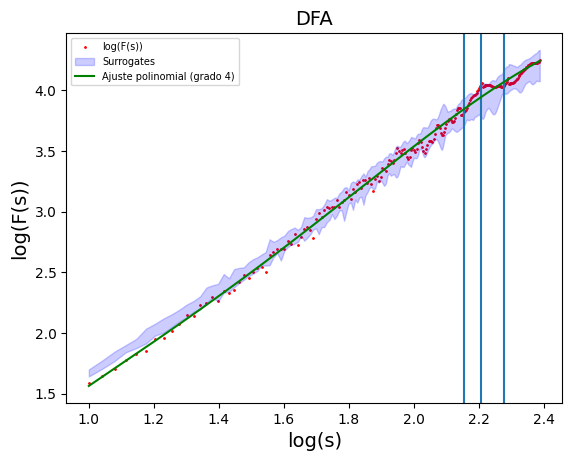

converged


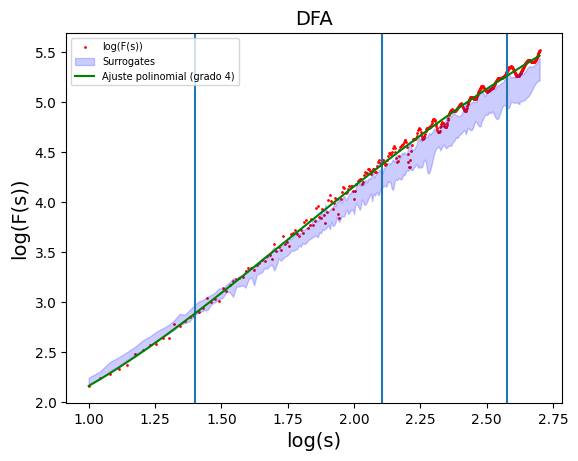

converged


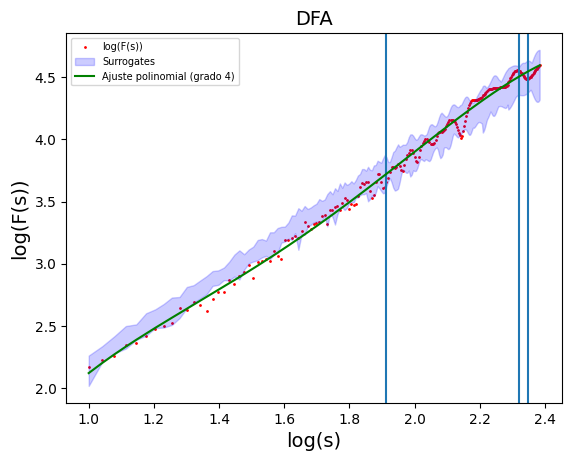

converged


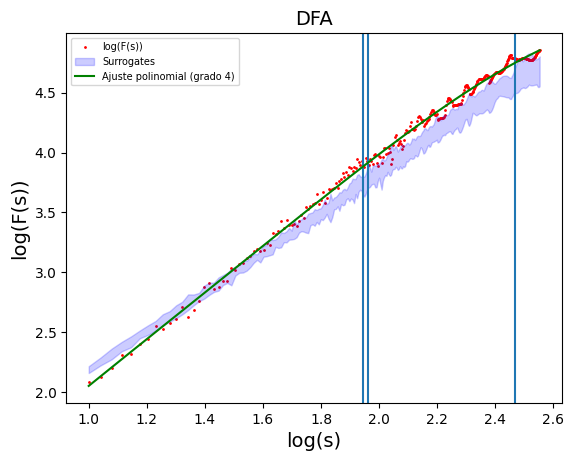

converged


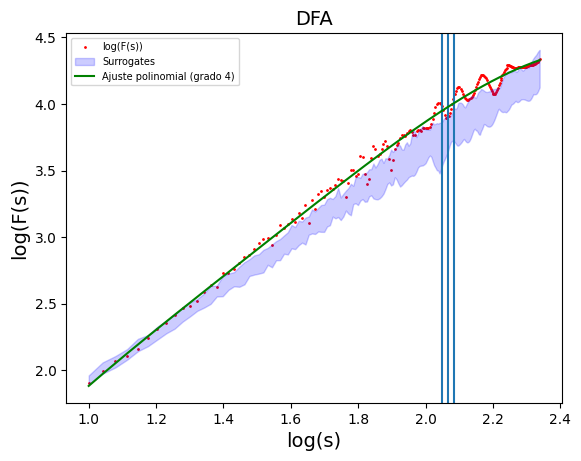

converged


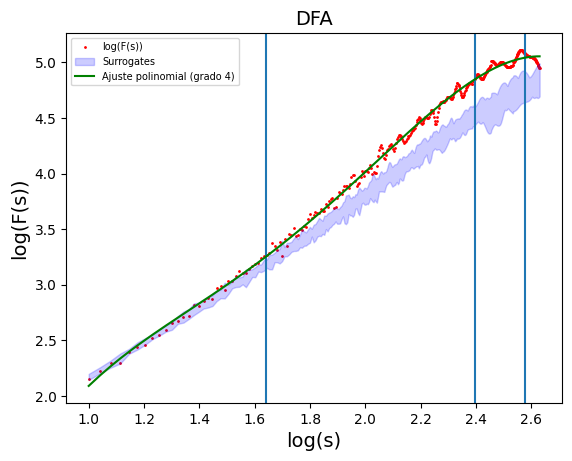

converged


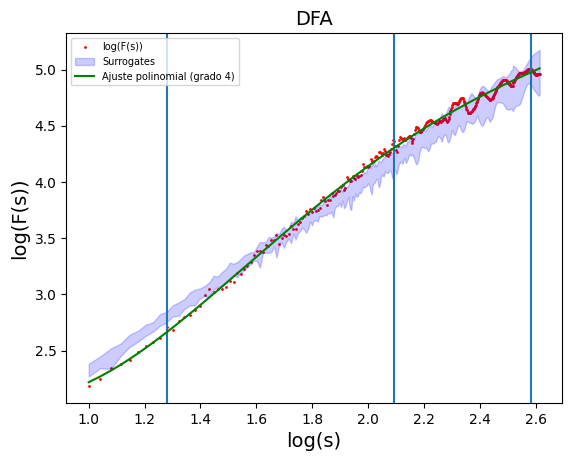

converged


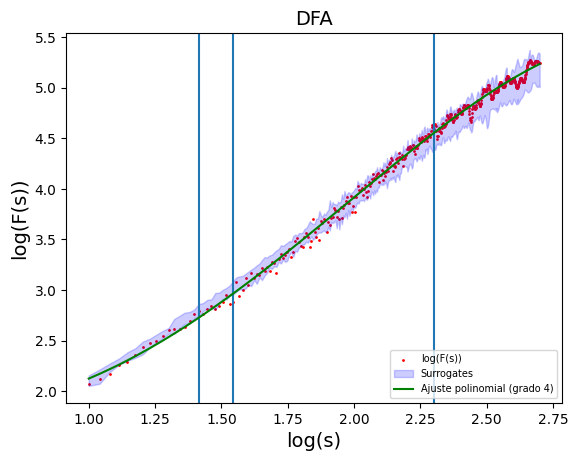

converged


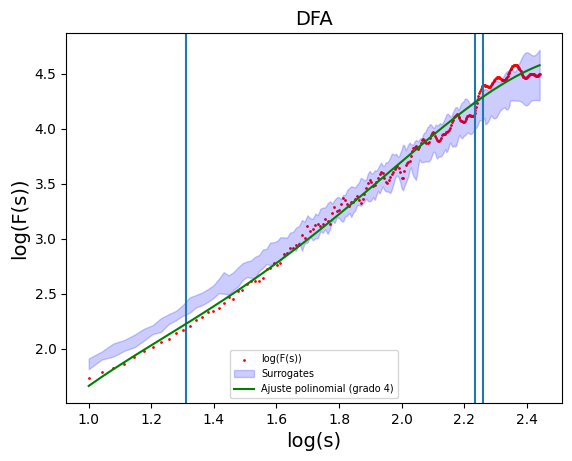

converged


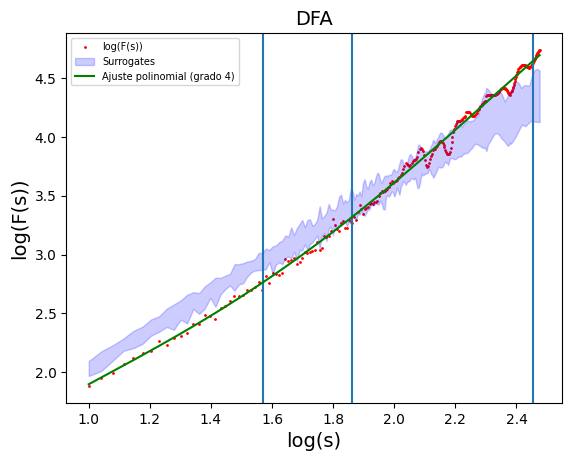

converged


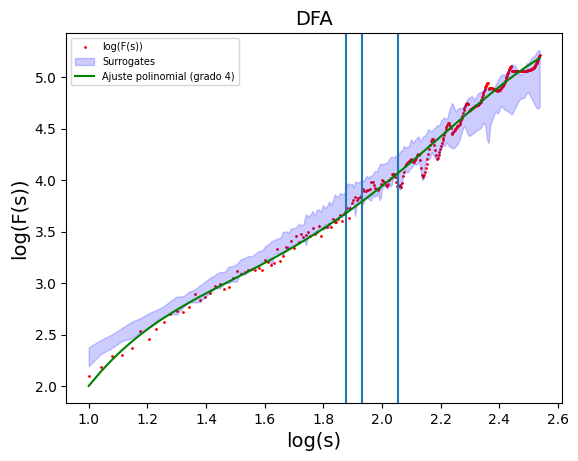

converged


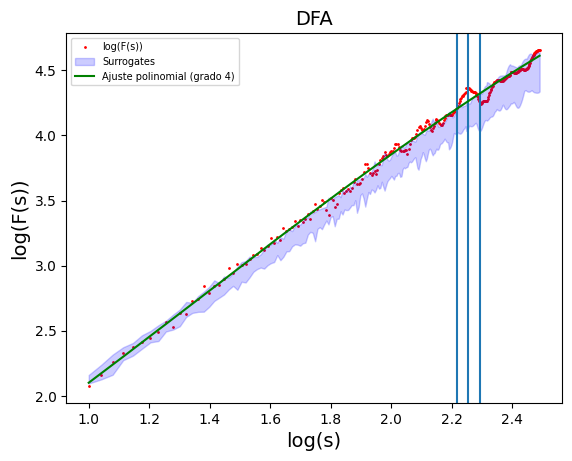

converged


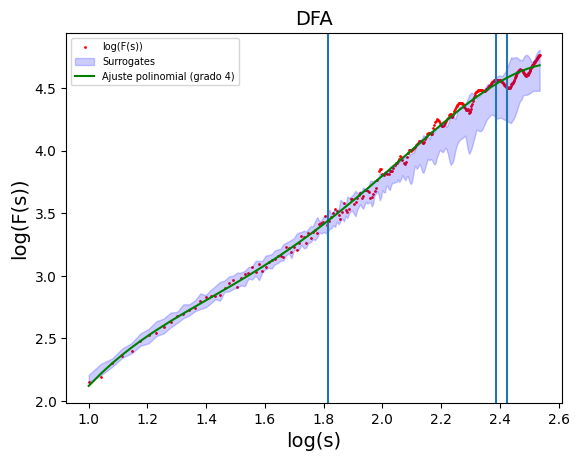

converged


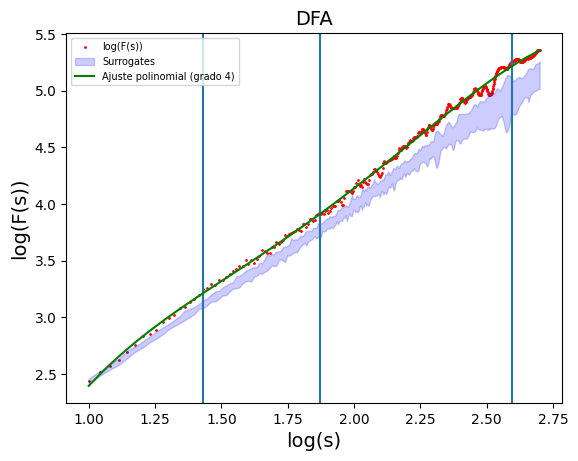

converged


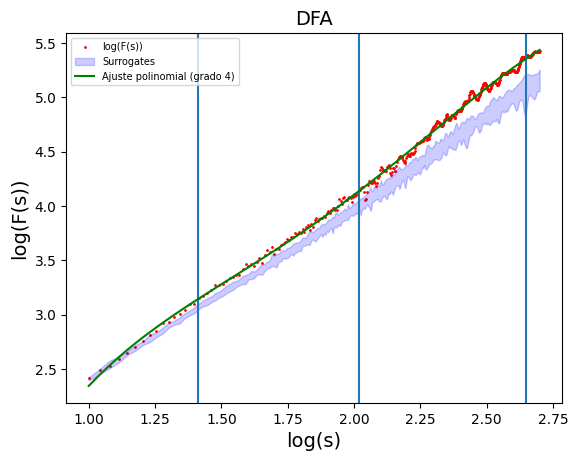

converged


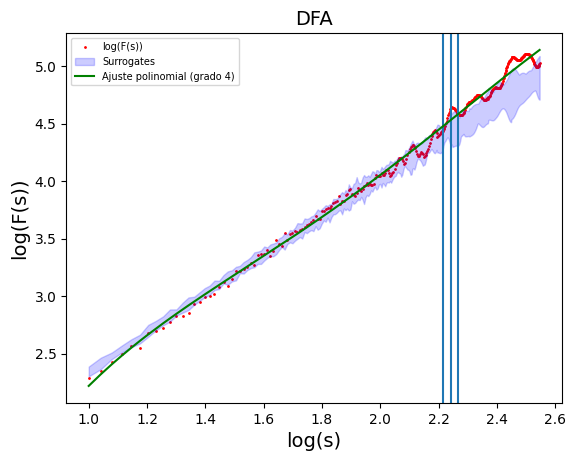

converged


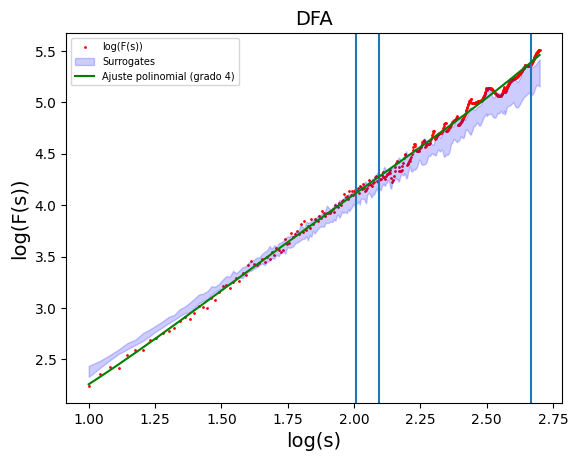

converged


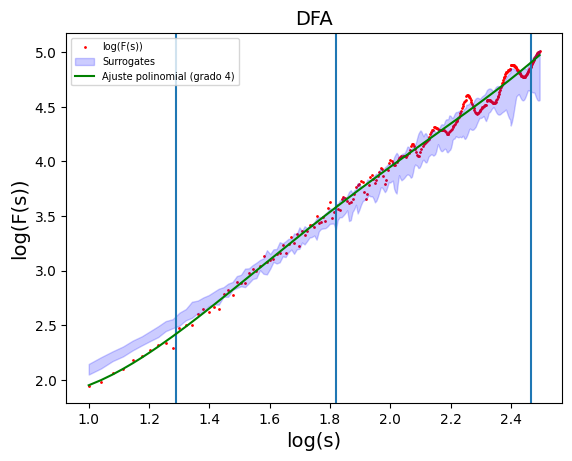

converged


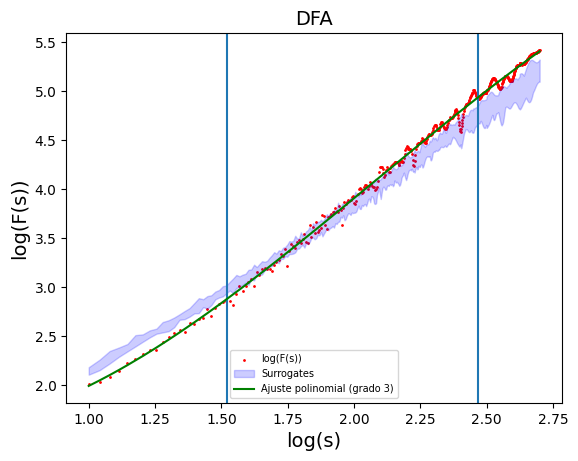

converged


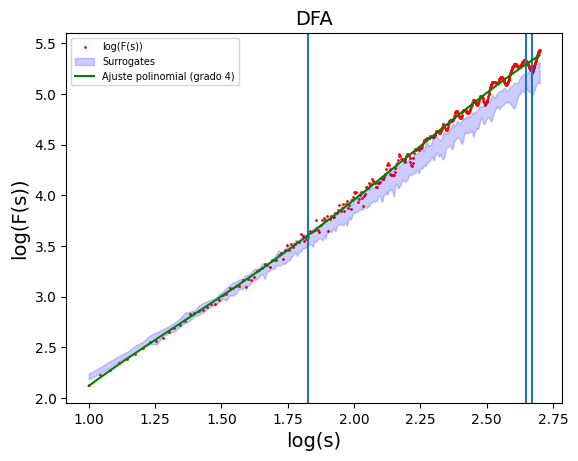

converged


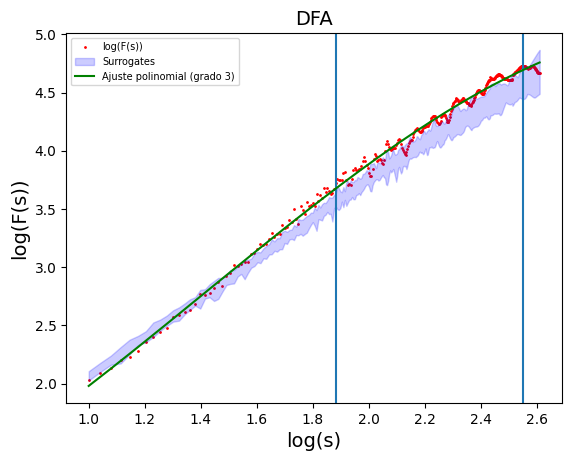

converged


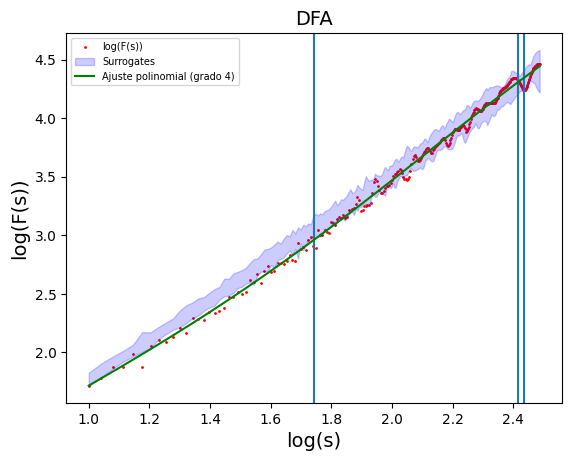

converged


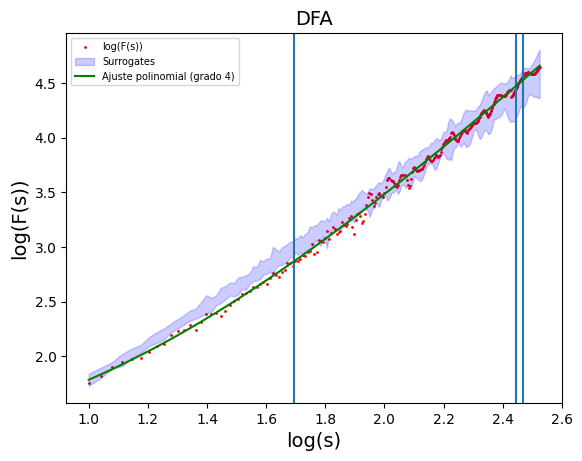

converged


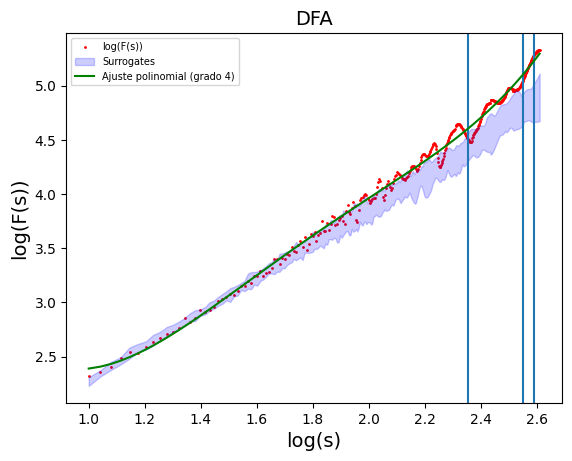

converged


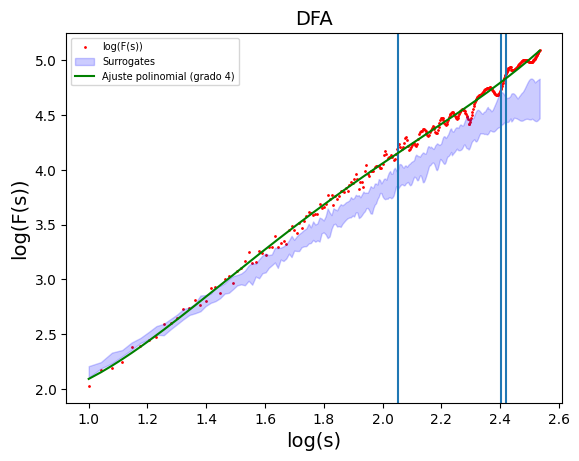

converged


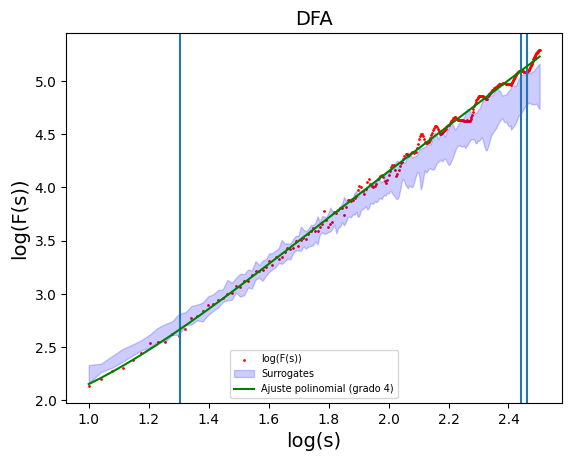

converged


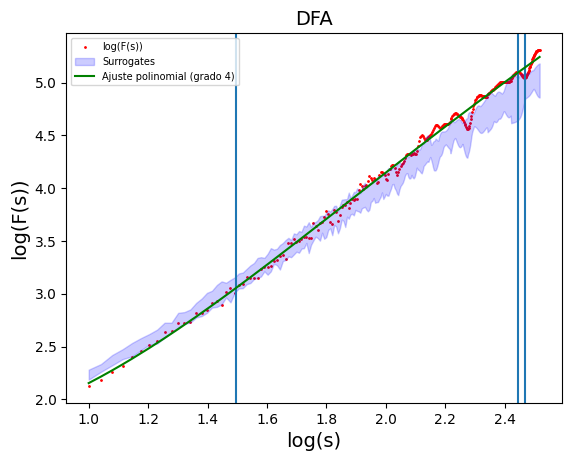

converged


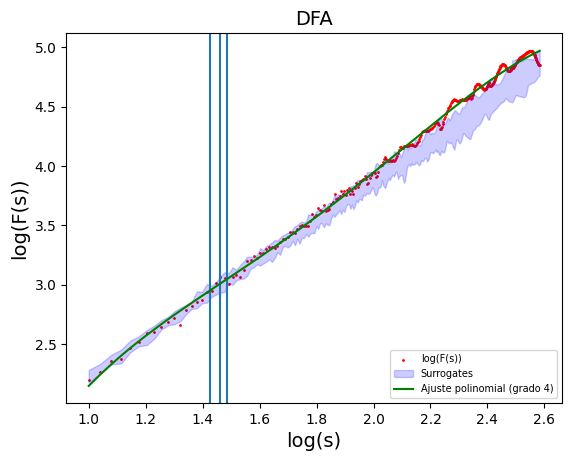

converged


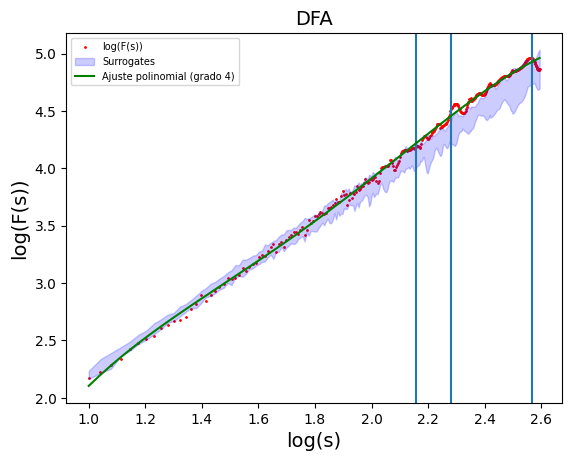

converged


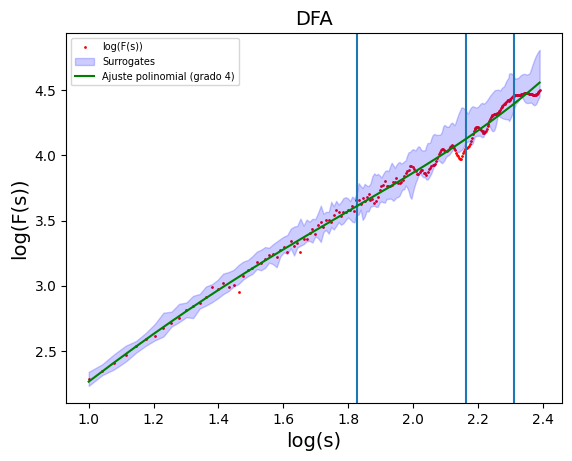

converged


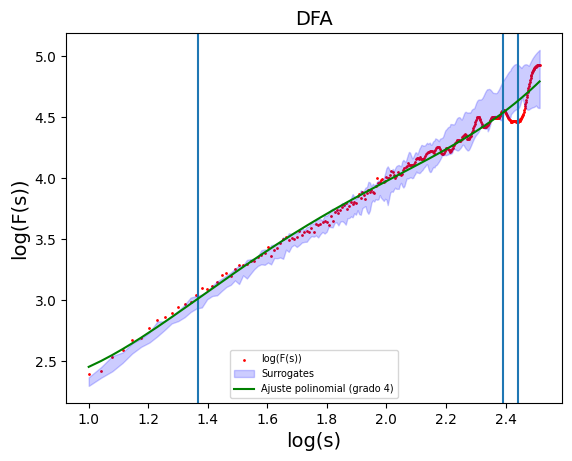

converged


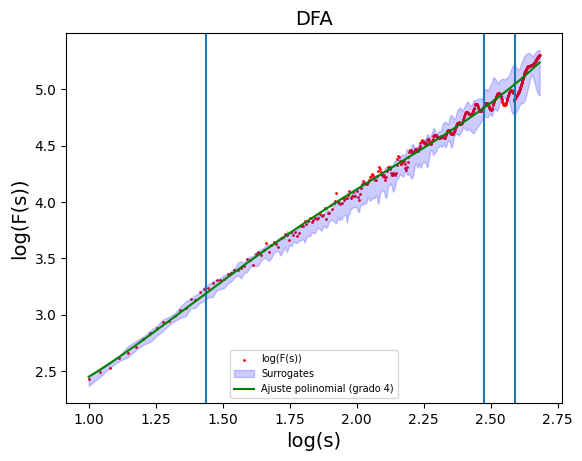

converged


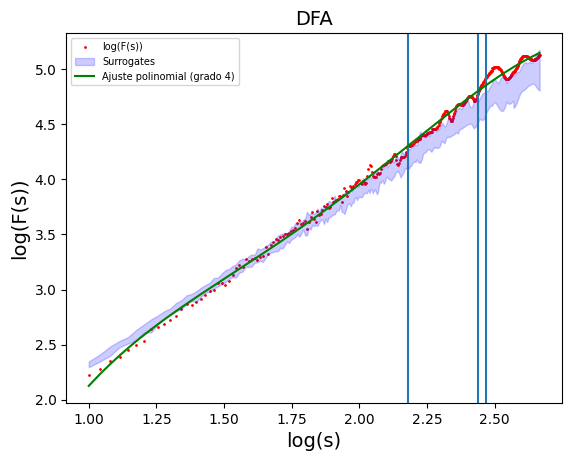

converged


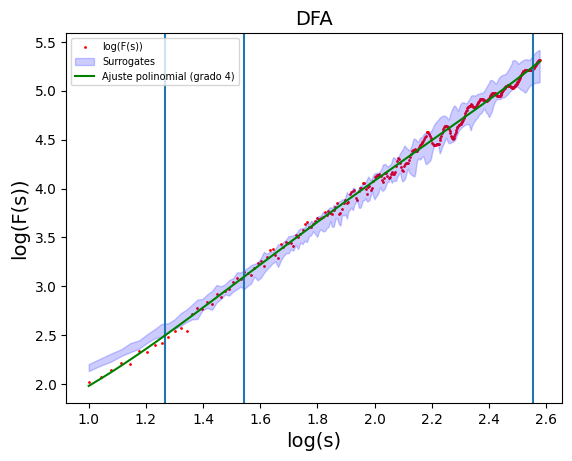

converged


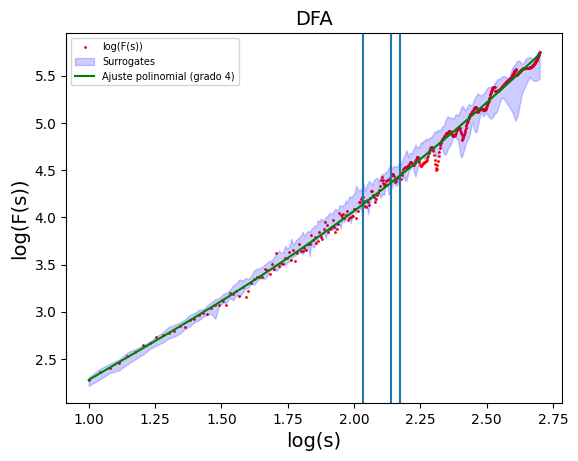

converged


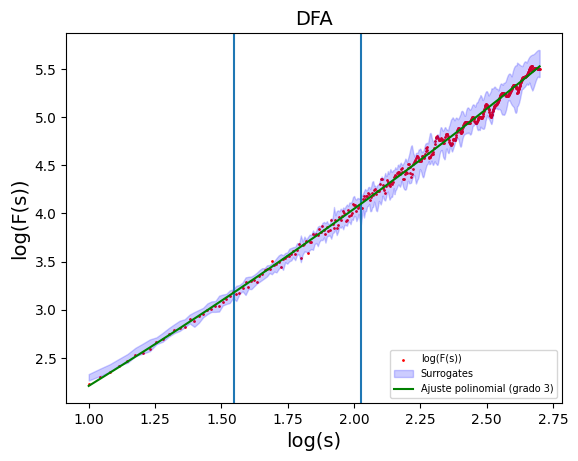

converged


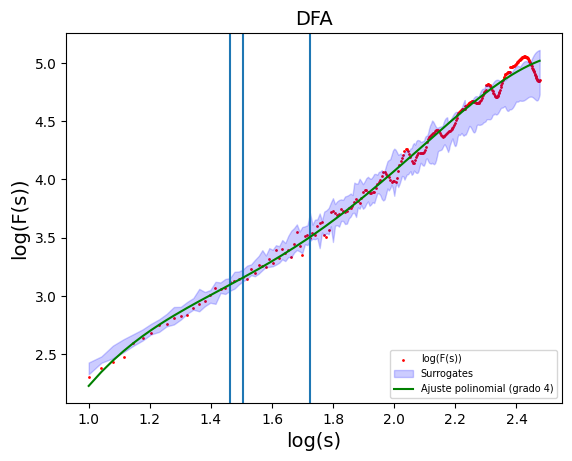

converged


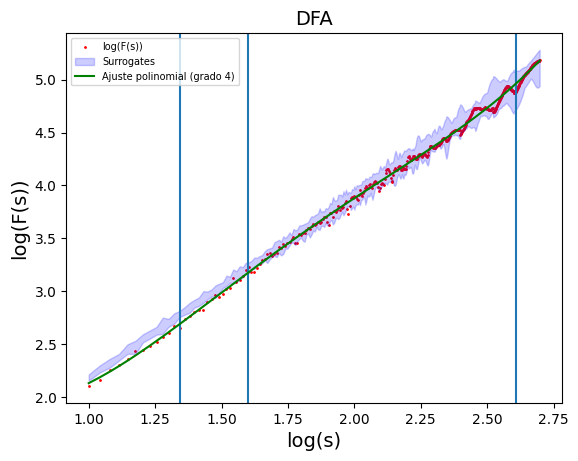

converged


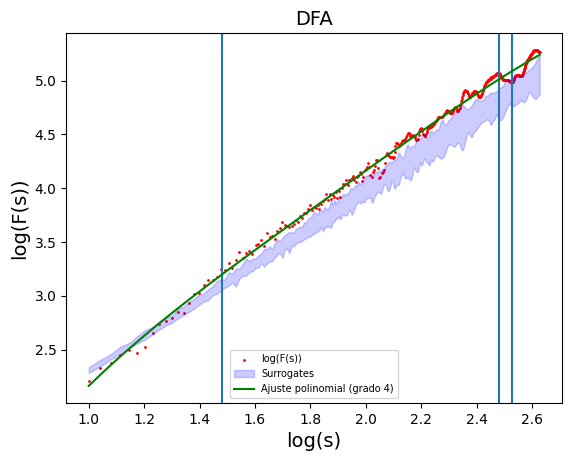

converged


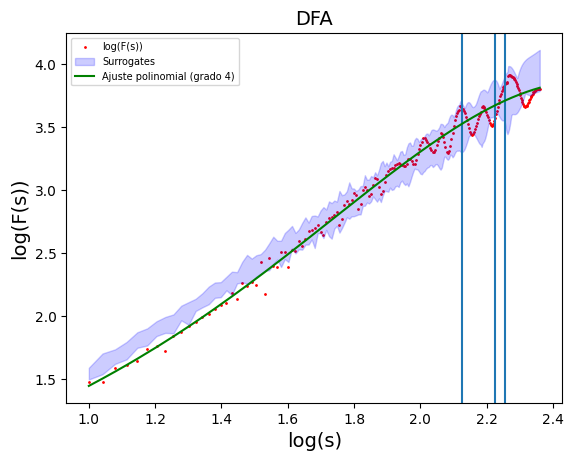

converged


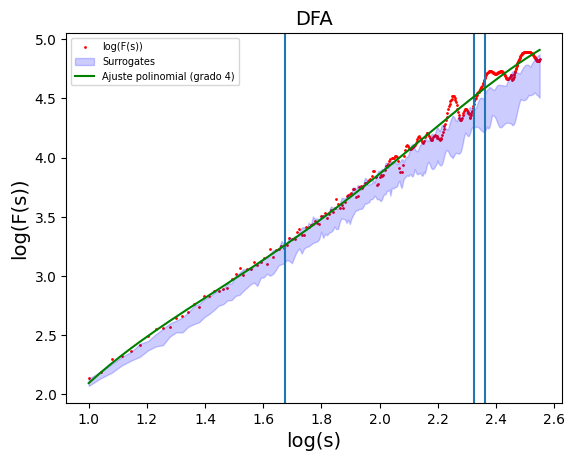

converged


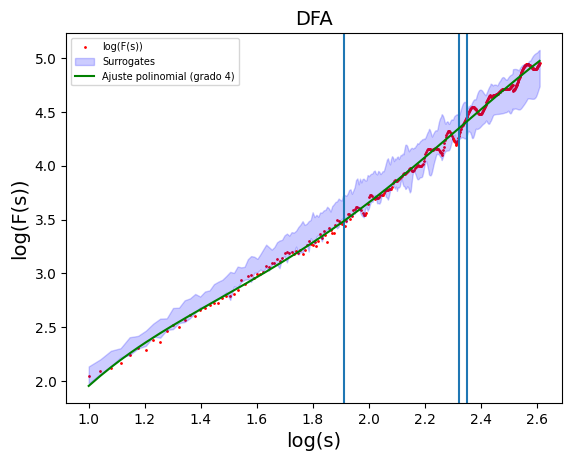

converged


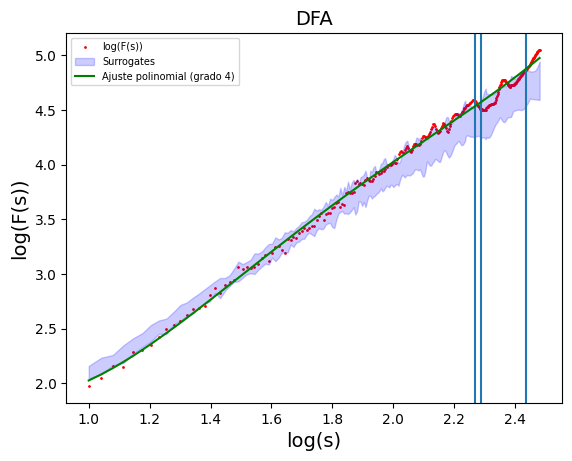

converged


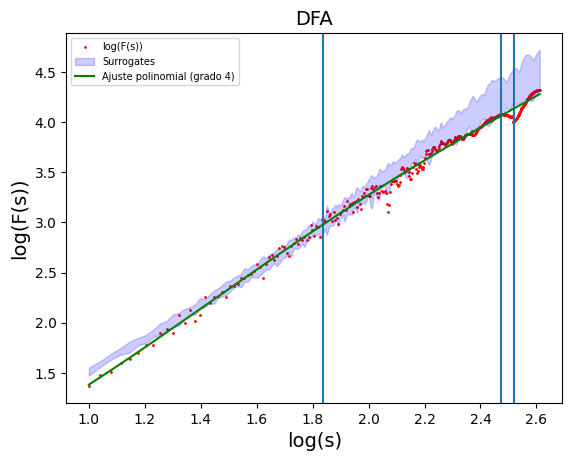

converged


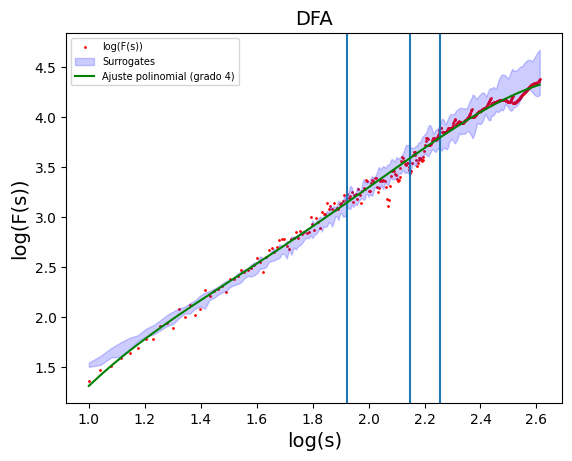

converged


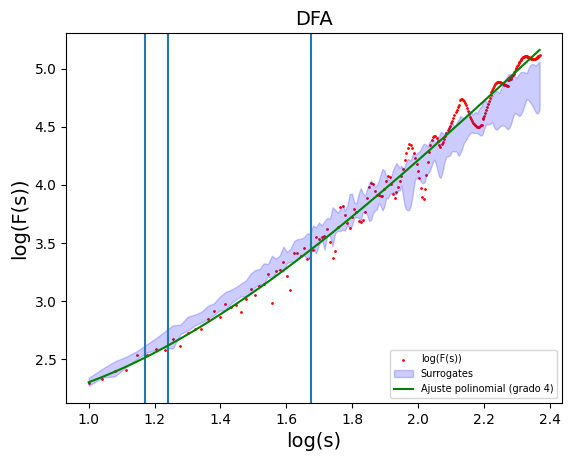

converged


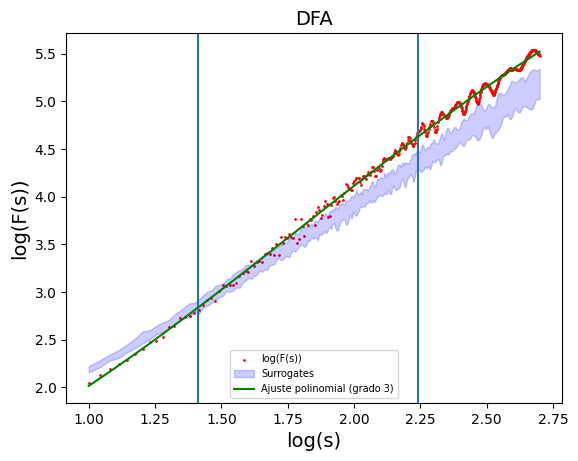

converged


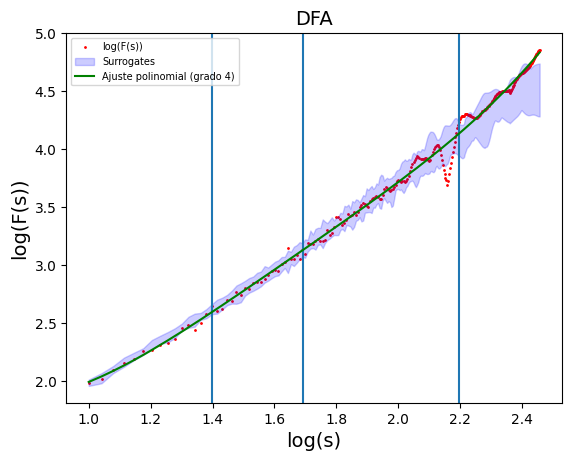

converged


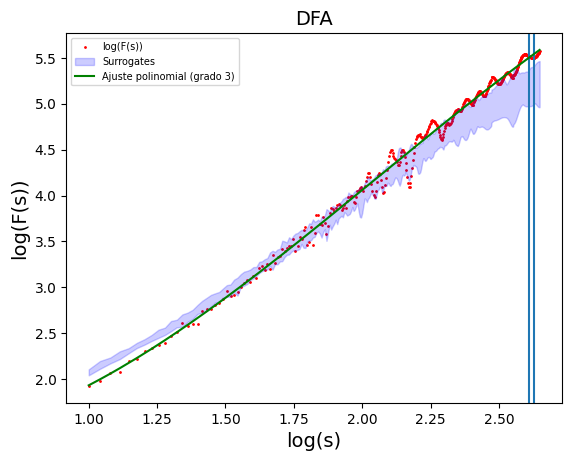

converged


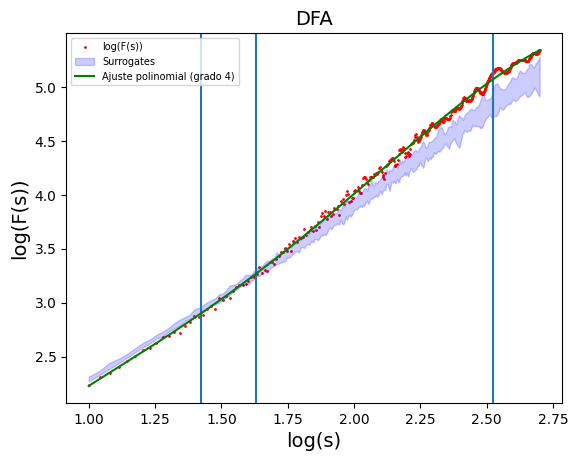

converged


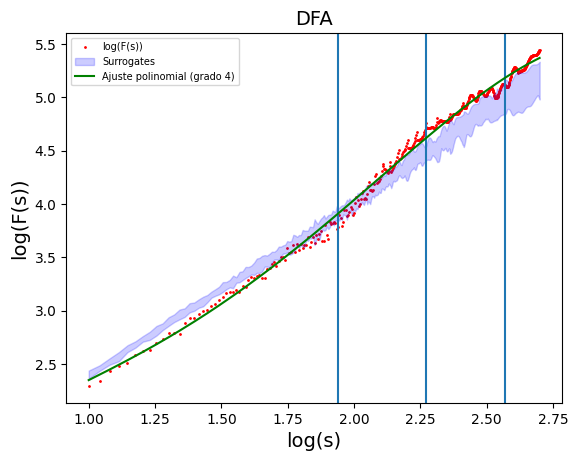

converged


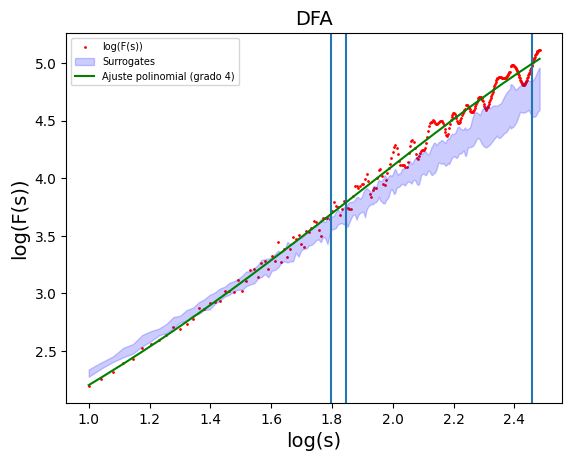

converged


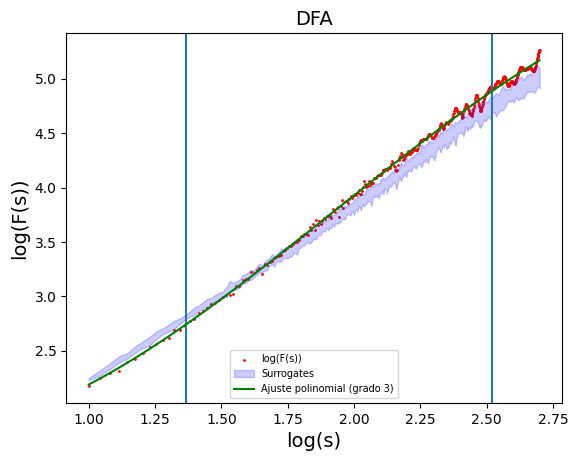

converged


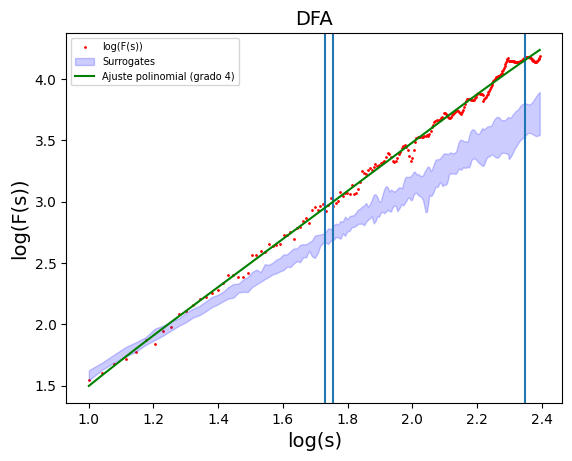

converged


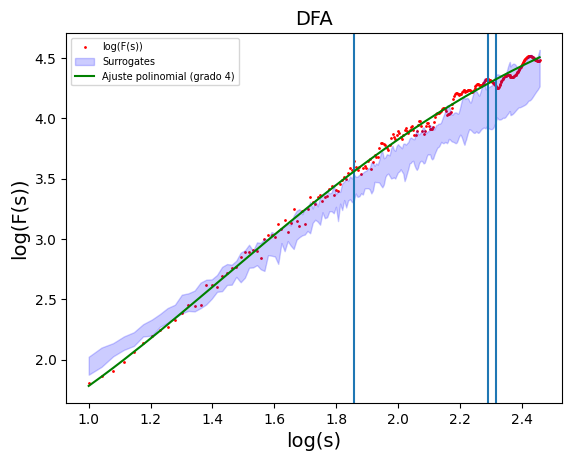

converged


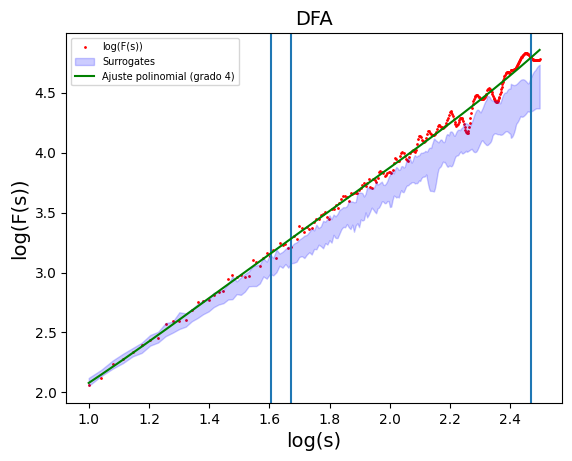

converged


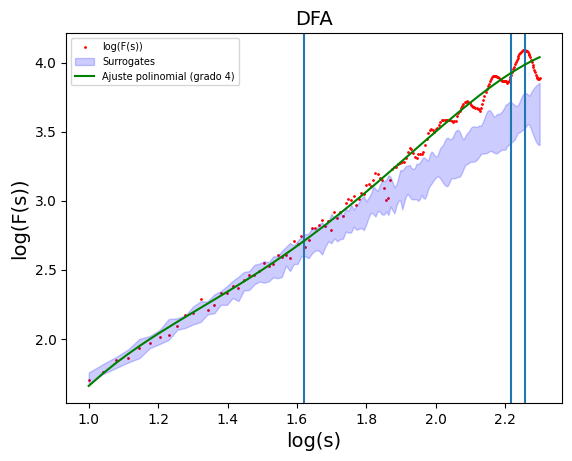

converged


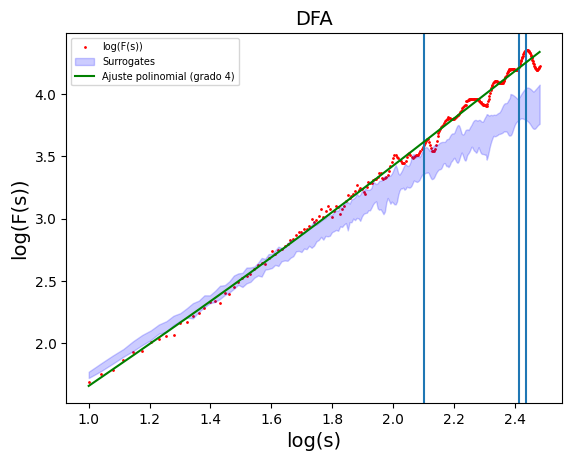

converged


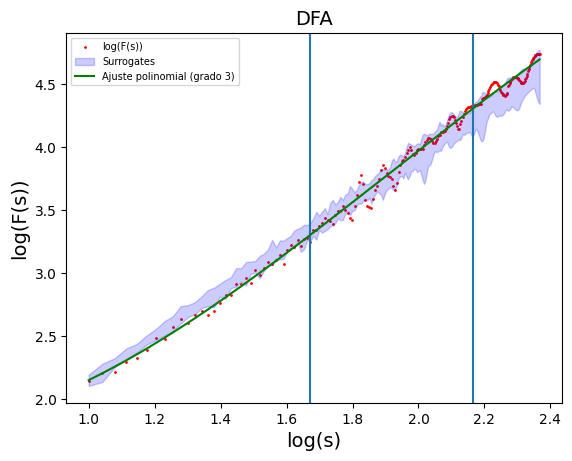

converged


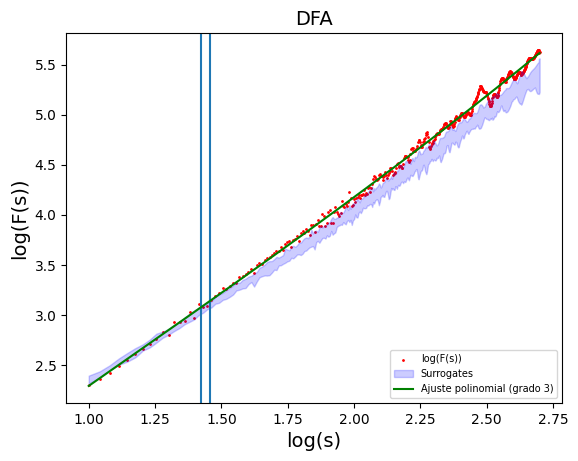

converged


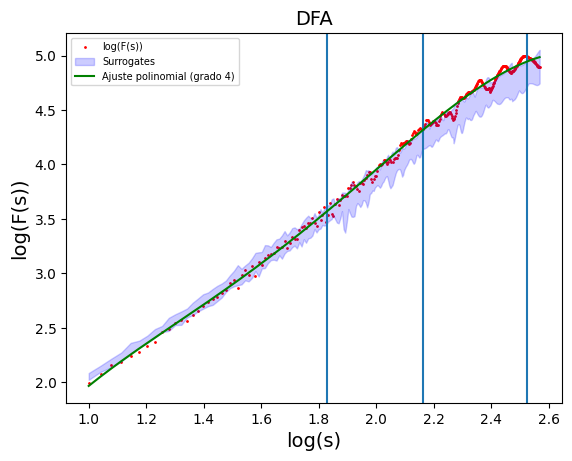

converged


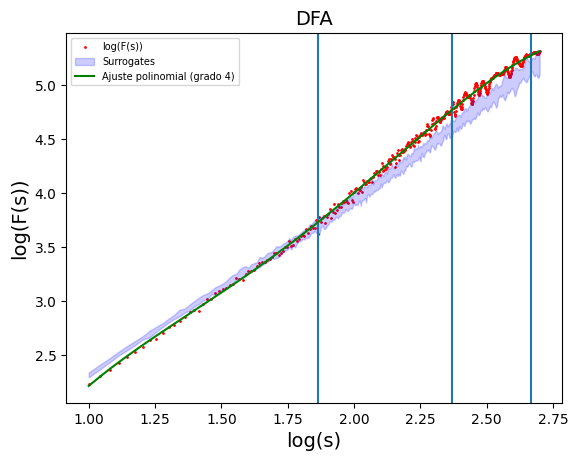

converged


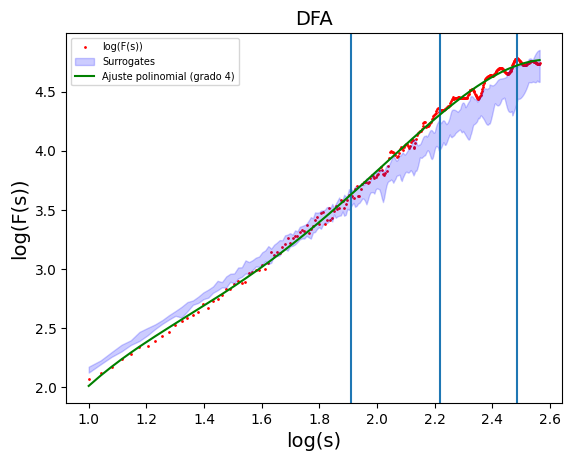

converged


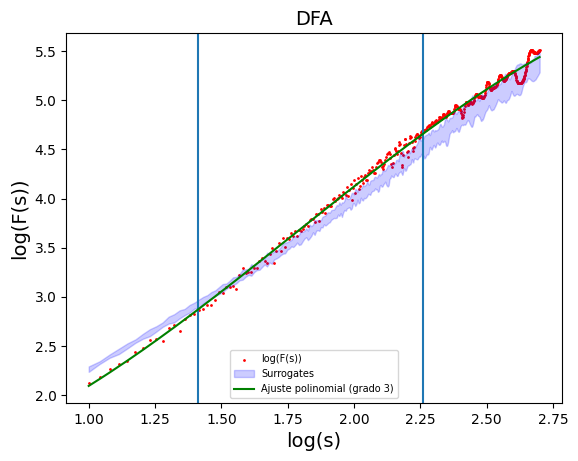

converged


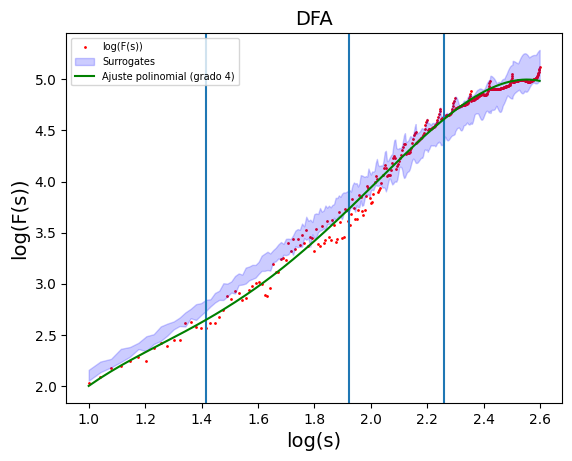

converged


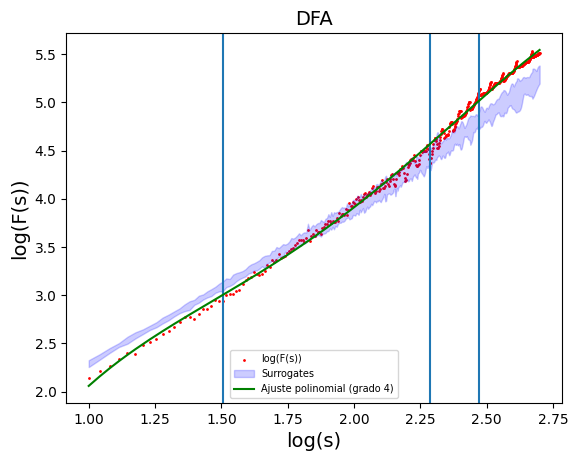

converged


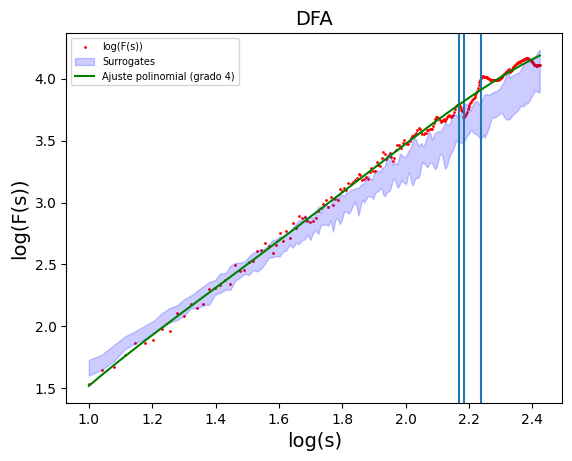

converged


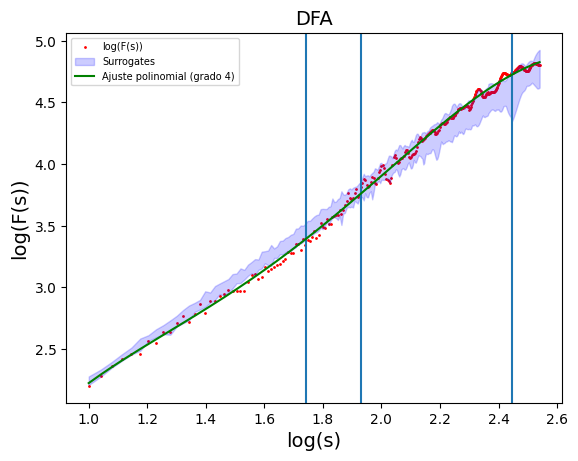

converged


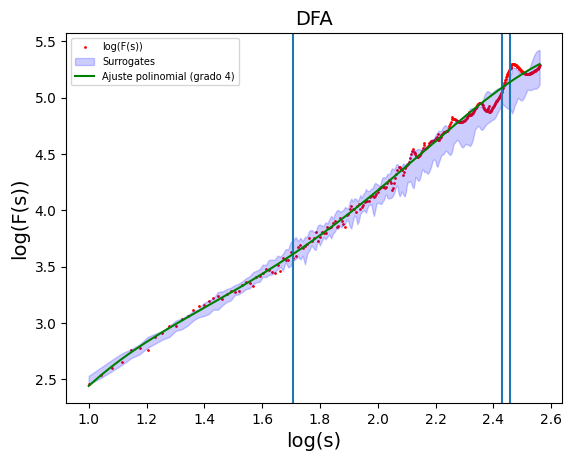

converged


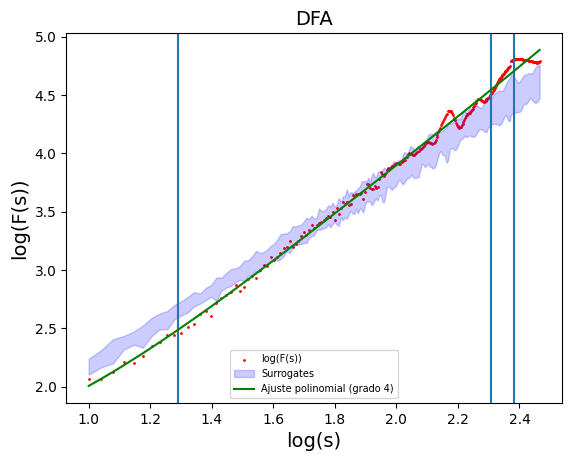

converged


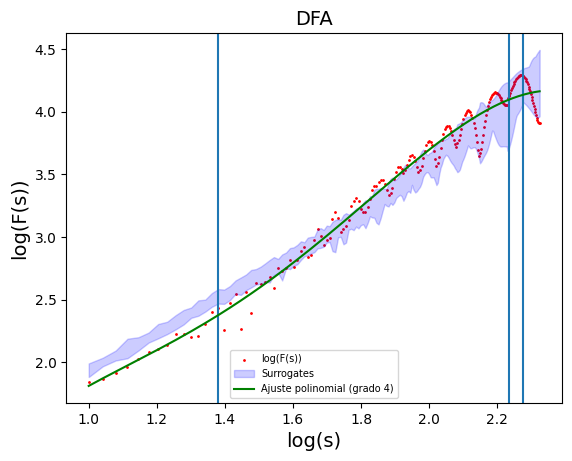

converged


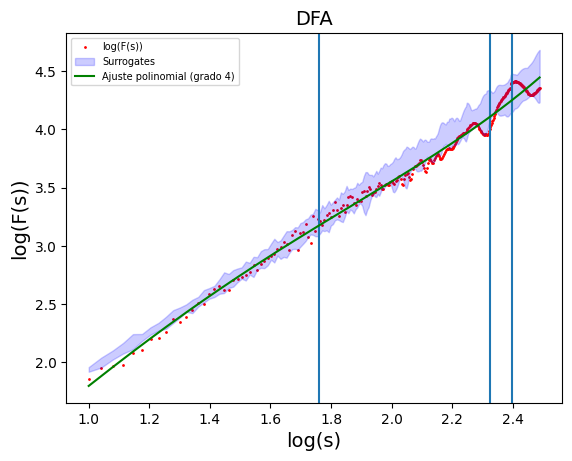

converged


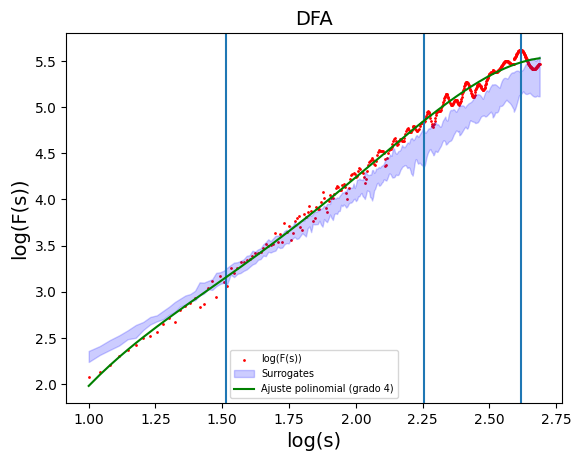

converged


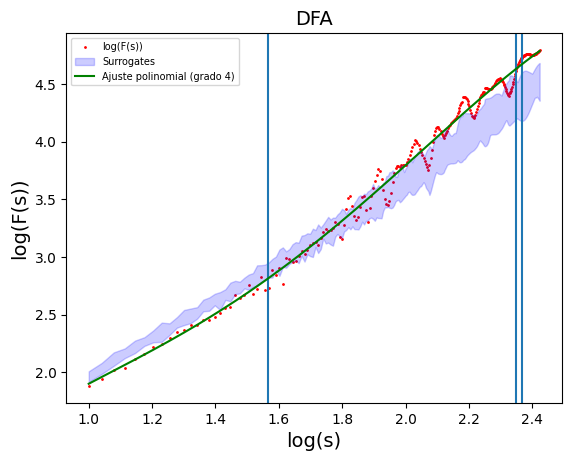

converged


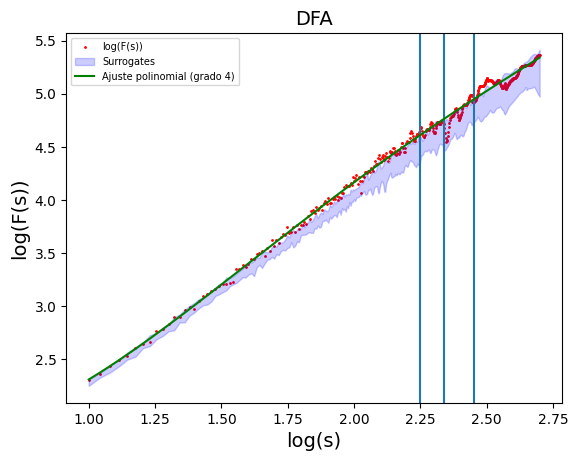

converged


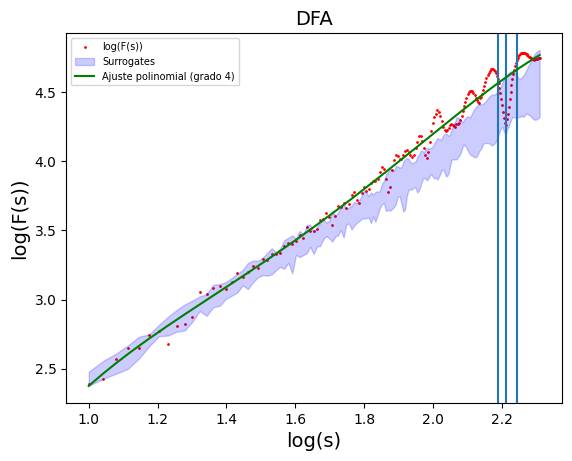

converged


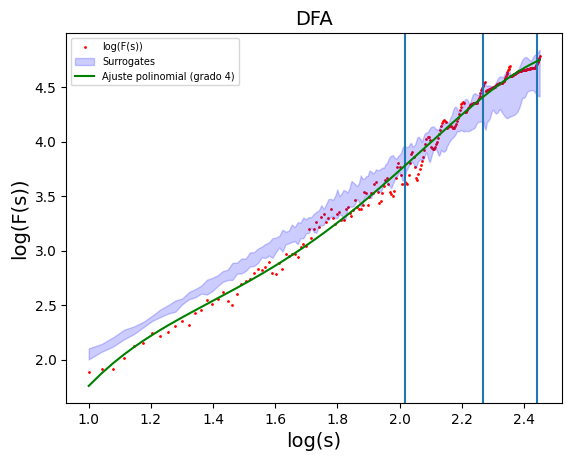

converged


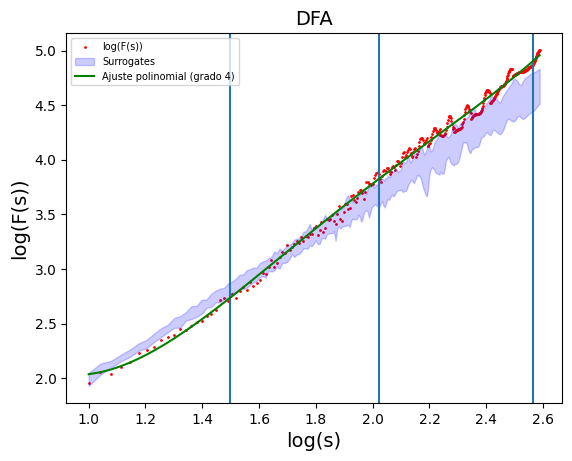

converged


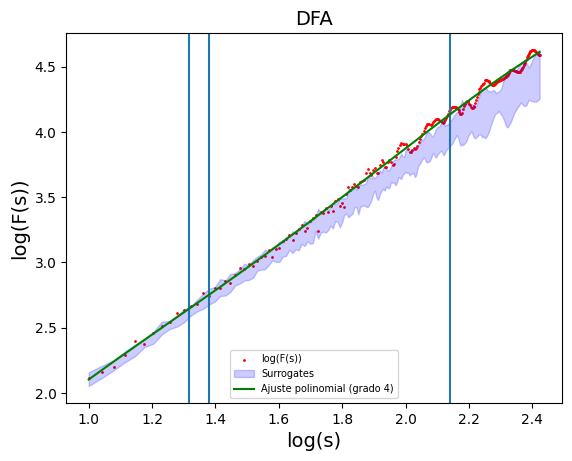

converged


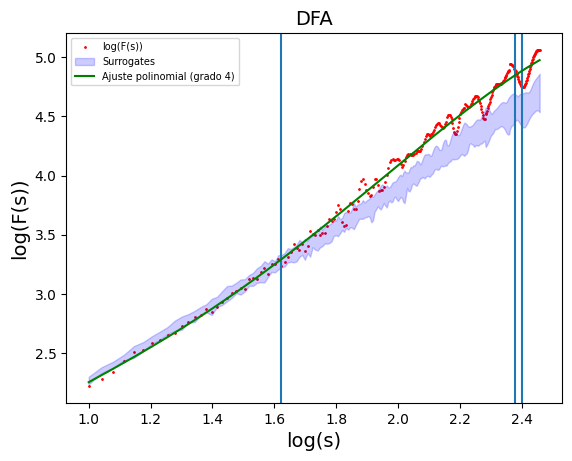

converged


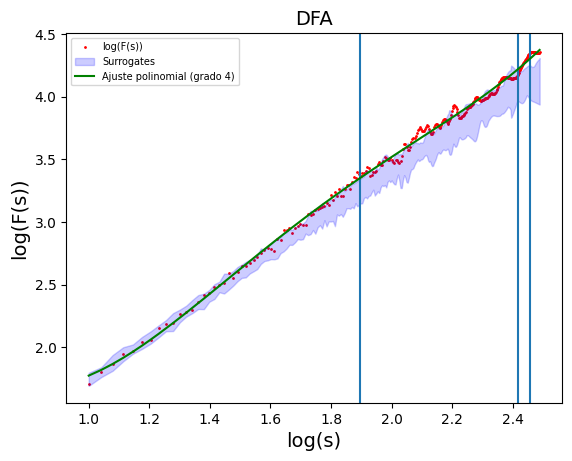

converged


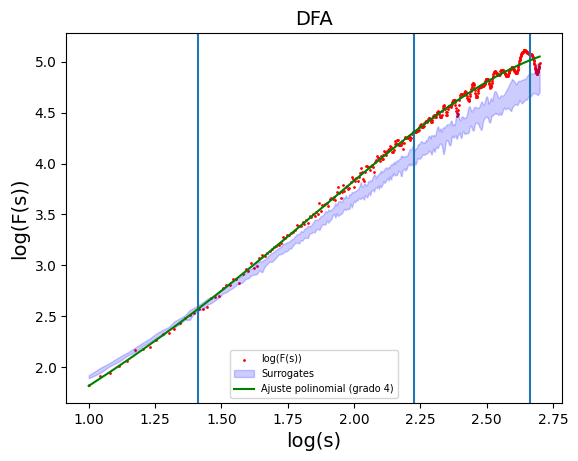

converged


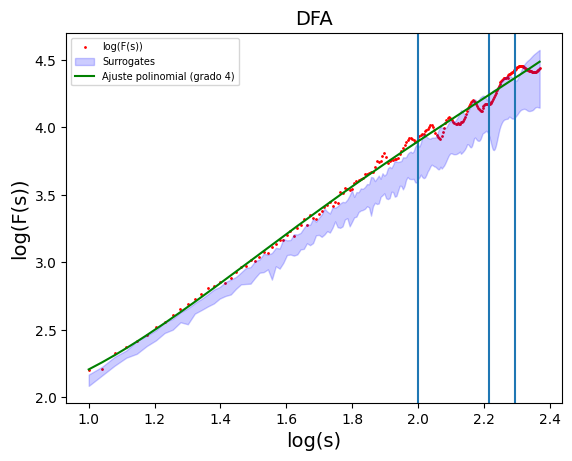

converged


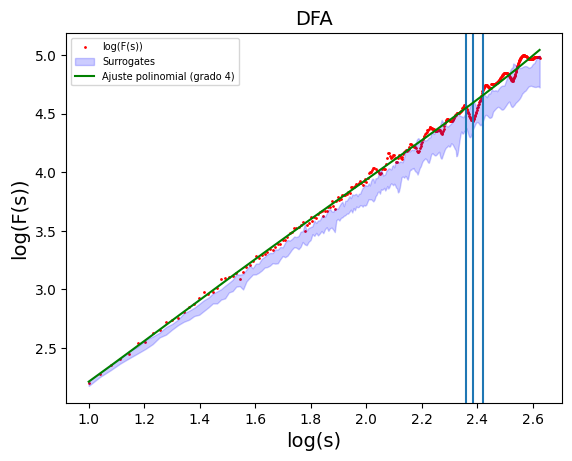

converged


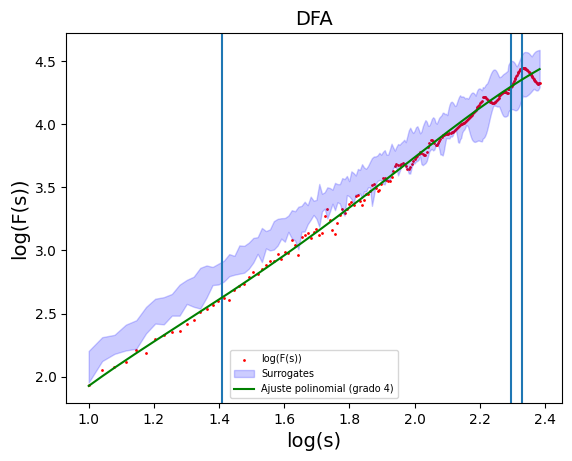

converged


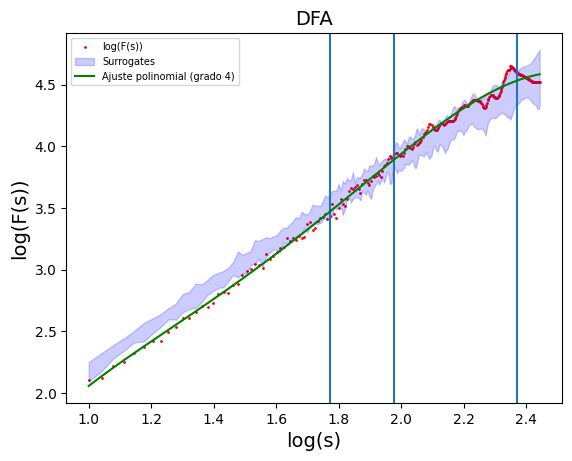

converged


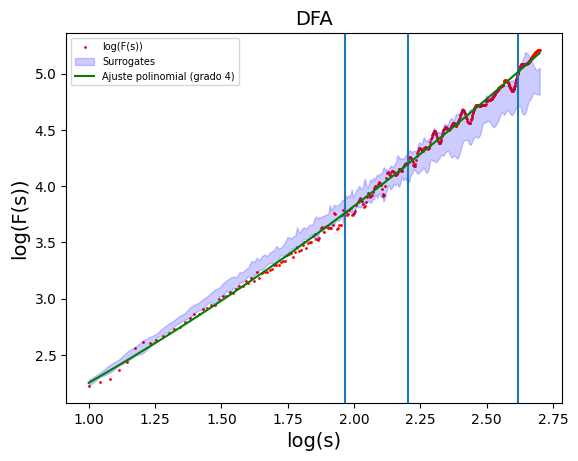

converged


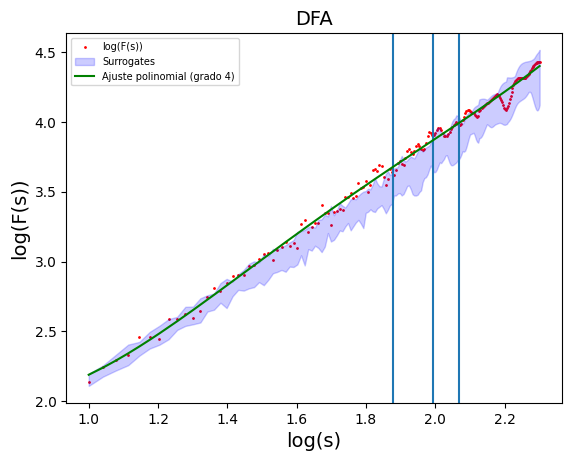

converged


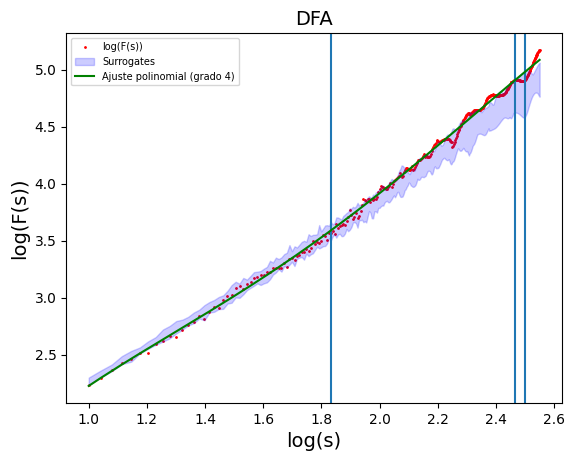

converged


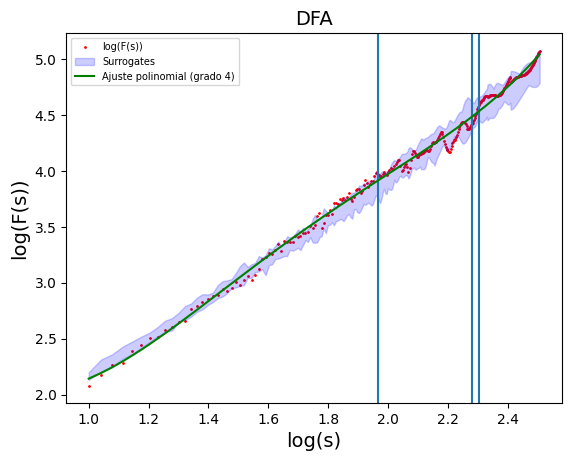

converged


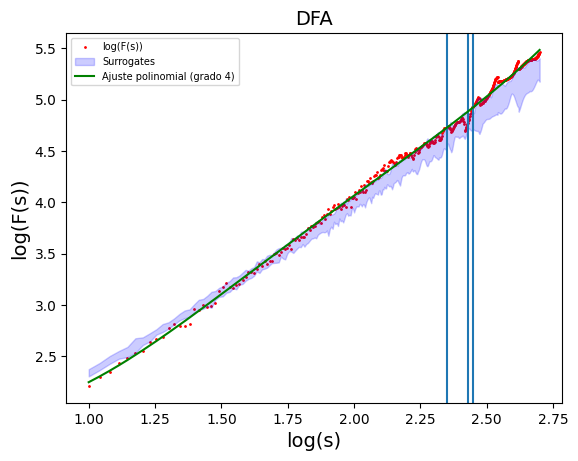

converged


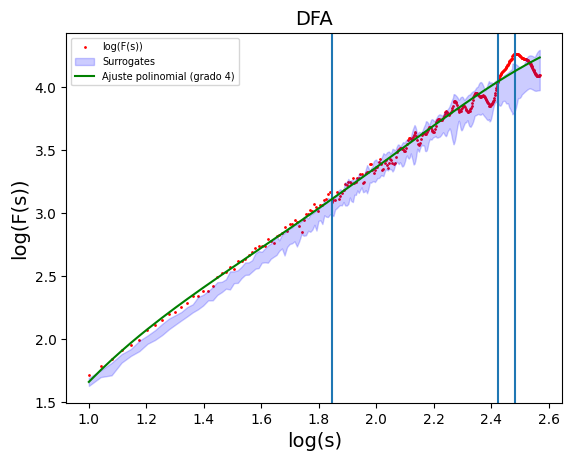

In [154]:
composer = 'Debussy'
xi_index = np.zeros((datos_composers_Hz_depurado_v2[composer]['# Piezas'], 2))

for i, serie in enumerate(composers_Hz_depurado_v2[composer].keys()): 
    # if int(serie.split('_')[1]) < 413:
    #     print(serie)
    #     continue
    subject = composers_Hz_depurado_v2[composer][serie]
    xi_index[i,0] = int(serie.split('_')[1])
    xi_index[i,1] = main(subject, 'MDFA')

In [13]:
np.set_printoptions(suppress=True)
xi_index = np.load('xi_index/1756_Mozart_xi.npy')
print(xi_index[np.where(xi_index[:,0]==12),1][0][0])

1.2540177447762855


In [158]:
def porcentaje_mayores_a_uno(array):
    array = np.array(array)  # Asegurarse de que sea un array de numpy
    total = len(array)
    mayores_a_uno = np.sum(array > 1.)  # Contar números mayores a 1
    porcentaje = (mayores_a_uno / total) * 100
    return porcentaje


Ns = np.load('Ns_depurado.npy')//2
resultado = porcentaje_mayores_a_uno(xi_index[:,1])
J_OG = [1-np.load('J_composers_Hz_depurado.npy')[array] for array in range(np.shape(Ns)[0])]
J_OG = [array[~np.isnan(array)] for array in J_OG]

correlacion, p_valor = pearsonr(J_OG[18], xi_index[:,1])

print(f'Correlación de Spearman: {correlacion}')
print(f"El porcentaje de números mayores a 1 es: {resultado:.2f}%")


Correlación de Spearman: 0.04029881121277255
El porcentaje de números mayores a 1 es: 82.61%


2677 2677 2677


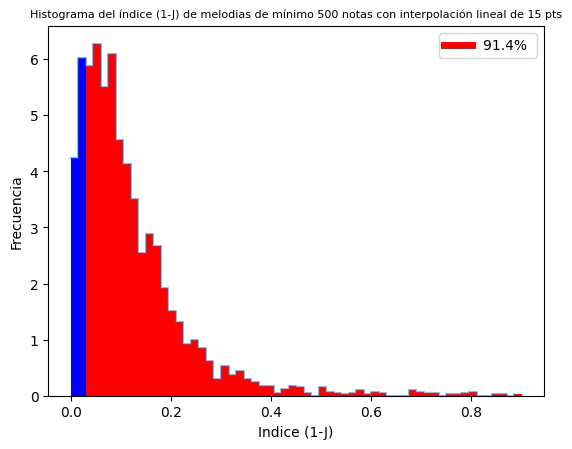

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import pickle
with open("J_run_avg.pkl", "rb") as f:
    J_run_avg = pickle.load(f)

data_nonlineality = np.load('xi_index_global.npy')#-(1-umbral)-0.2
# data1_flat = np.load('J_composers_lineal_global.npy')
pts_interp = 15
data1_flat = np.array([])
for composer in composers_depurado_v2.keys():
        array = 1-np.load('J_lineal_sincorte_depurado/interp_'+str(pts_interp)+'/'+ str(datos_composers[composer]['Birth_year']) + '_J_interp_' + str(composer) + '_lineal.npy')
        data1_flat = np.concatenate((data1_flat,array))

data2_flat = np.load('J_composers_hermite_global.npy')
OG_data_flat = 1-np.load('J_composers_global.npy')
J_run_avg = np.concatenate(J_run_avg)
data_constante = np.load('J_composers_interp_constant.npy')
print(len(OG_data_flat),len(data_nonlineality),len(data1_flat))

umbral = 0.019061054240866748
# umbral = 0.02905897738354482
# umbral = 0.031481763770571186
# umbral = 0.035399093872396606
# umbral = 0.041381653029154905
# umbral = 0.0745374980780404
# Crear histogramas y obtener los valores de las barras
porcentaje = 91.4

# counts_epsilon, bins_epsilon, _ = plt.hist(data_nonlineality,bins='auto', color='green', alpha=1, edgecolor='none', label=f'$\epsilon$ index',density= True)
counts1, bins1, patches = plt.hist(data1_flat,bins=60, alpha=1,color='red', edgecolor='none', label=f'Index J {porcentaje:.1f}% (Interplineal {pts_interp} pts)', density = True)
# plt.hist(data1_flat[data1_flat < umbral],bins=5, alpha=1,color='blue', edgecolor='none',density=True)
# counts2, bins2, _ = plt.hist(data2_flat, bins=50, color='blue', alpha=1, edgecolor='none', label='Index J (InterpHermite)', density = True)
# counts3, bins3, _ = plt.hist(OG_data_flat, bins=50, color='gray',alpha=1, edgecolor='none', label='Index J (Datos Originales)',density = True)
# counts4, bins4, _ = plt.hist(J_run_avg, bins=50, color='brown', alpha=1, edgecolor='none', label='Index J (Running avg)', density = True)
# counts5, bins5, _ = plt.hist(data_constante, bins=50, color='green', alpha=1, edgecolor='none', label='Index J (Interp constante)', density = True)

# Dibujar los contornos superiores de cada histograma

# plt.plot(bins_epsilon[:-1], counts_epsilon, drawstyle='steps-post', color='green')
plt.plot(bins1[:-1], counts1, drawstyle='steps-post', alpha = 0.5)
for i, patch in enumerate(patches):
    if bins1[i] <= umbral:  # Comparar con el borde izquierdo del bin
        patch.set_facecolor('blue')  # Color para bins a la izquierda
    else:
        patch.set_facecolor('red') 
# plt.plot(bins2[:-1], counts2, drawstyle='steps-post', color='blue',alpha = 0.5)
# plt.plot(bins3[:-1], counts3, drawstyle='steps-post', color='white',alpha = 0.3)
# plt.plot(bins4[:-1], counts4, drawstyle='steps-post', color='brown',alpha = 0.5)
# plt.plot(bins5[:-1], counts5, drawstyle='steps-post', color='green',alpha = 0.5)
# plt.axvline(x=umbral, color='black', linestyle='--', linewidth=1, label='Umbral')

# Personalizar la gráfica
plt.xlabel(r'Indice (1-J)')
# plt.xlabel(r'Indice de no linealidad $\xi$')
plt.ylabel('Frecuencia')
# plt.title(r'Histograma del índice (1-J) de melodias de mínimo 500 notas (sin interpolación)', fontsize=8)
plt.title(r'Histograma del índice (1-J) de melodias de mínimo 500 notas con interpolación lineal de'+f' {pts_interp} pts', fontsize=8)
custom_legend = [
    # Line2D([0], [0], color='black', linestyle='--', label='Umbral'),
    Line2D([0], [0], color='red', lw=5,label=f'{porcentaje:.1f}% '),
]
plt.legend(handles=custom_legend)
plt.show()